**NEW Figure 4**
- plus supplementary figure

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy
import os
import glob
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
# for plots withinplots 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import pearsonr, spearmanr

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
glob_temp = np.arange(-0.2,6.8,0.1)

add = ''
# add= '_temp_above_0_8'
# this is actually not neces
approach = '_via_5yravg'
DATE = 'Feb12_2024'

no_rel_farinotti = True ### did not do the lowess stuf rel_farinotti!!!

In [2]:
from help_functions import d_reg_num_name

In [3]:
p_shift='_shift_years_rel_2020'

# todo: move that to the lowess fit stuff directly????
avg_over = '101yr'
#add = '_fit_to_median_lowess_added'
add = '_lowess_added_quantiles_added'
rel_add = '_rel_2020'
norm_add = '_clusters_normalised'
k = 3

In [4]:
pd_lowess_ch = pd.read_csv(f'lowess_fit_cluster{k}_{rel_add}_{avg_over}_{add}{norm_add}{DATE}.csv',
                          index_col=[0])
pd_lowess_ch['region'] = pd_lowess_ch.index
pd_lowess_ch.index = pd_lowess_ch.index.str.replace('Globally', 'All')



# palette_cb = sns.color_palette(['#785EF0', '#DC267F', '#FE6100', '#FFB000', '#648FFF'])
cols = list(sns.color_palette('colorblind'))
palette_cb = sns.color_palette([cols[5],cols[4],cols[2], cols[7]])

num_dict = {0:'(a)', 1:'(b)', 2:'(c)', 3:'(d)', 4: '(e)',
            5:'(f)', 6:'(g)', 7:'(h)', 8:'(i)', 9:'(j)',
            10:'(k)', 11:'(l)', 12:'(m)'} # remove global stuff


plt.rc('font', size=22)  

In [5]:

fs = 27

def plotlabel_0(xvar, yvar, label, ax=None):
    ax.text(xvar-10, yvar+0.8, label, alpha=0.7, fontsize=fs)
    
def plotlabel_1(xvar, yvar, label, ax=None):
    ax.text(xvar+0-1, yvar+0.8, label, alpha=0.7, fontsize=fs)    
    

def plotlabel_b0(xvar, yvar, label, ax=None):
    ax.text(xvar+5, yvar-3.1, label, alpha=0.7, fontsize=fs)

def plotlabel_b(xvar, yvar, label, ax=None):
    ax.text(xvar, yvar-3.1, label, alpha=0.7, fontsize=fs)
    
def plotlabel_bbr(xvar, yvar, label, ax=None):
    ax.text(xvar-0.01, yvar-32, label, alpha=0.7, fontsize=fs)
    
def plotlabel_bbl(xvar, yvar, label, ax=None):
    ax.text(xvar-1, yvar-32, label, alpha=0.7, fontsize=fs)
    
def plotlabelr_l(xvar, yvar, label, ax=None):
    ax.text(xvar-1, yvar+5, label, alpha=0.7, fontsize=fs)

def plotlabelr(xvar, yvar, label, ax=None):
    ax.text(xvar-0.01, yvar+2, label, alpha=0.7, fontsize=fs)
    
    
def plotlabel_c(xvar, yvar, label, ax=None):
    ax.text(xvar-0.08, yvar+0.02, label, alpha=0.7, fontsize=fs)

def plotlabel_cc(xvar, yvar, label, ax=None):
    ax.text(xvar-0.03, yvar-0.06, label, alpha=0.7, fontsize=fs)


In [6]:
df = pd.read_csv(f'3_shift_summary_region_characteristics{DATE}.csv', index_col=[0])

df['gt_2020_via_5yravg'] = df['regional_volume_m3_2020_via_5yravg'] *900/ (1e9*1e3) # *kg/m3 
pd_lowess_ch['gt_2020_via_5yravg'] = pd_lowess_ch['regional_volume_m3_2020_via_5yravg']*900/ (1e9*1e3)

#_pd_lowess_ch = pd_lowess_ch.loc[pd_lowess_ch.region != 'Globally']
#_df = df.loc[df.region!='Globally']


_pd_lowess_ch = pd_lowess_ch.copy() # loc[pd_lowess_ch.index!='Globally']
_pd_lowess_ch['region'] = _pd_lowess_ch.index

In [7]:
d_reg_num_name['19'] = 'Subantarctic &\n      Antarctic Islands'
d_reg_num_name['12'] =  'Caucasus &\n      Middle East'
d_reg_num_name['05'] =  'Greenland\n      periphery'
d_reg_num_name['07'] = 'Svalbard &\n      Jan Mayen'

In [8]:
pd_hugo_far = pd.read_csv('rgi_vs_2020_volume_hugonnet_estimatesFeb12_2024.csv',index_col=0)
pd_hugo_far.index = pd_hugo_far.index.str.replace('Globally', 'All')

pd_hugo_far_reg = pd_hugo_far.iloc[:-1]
pd_hugo_far_reg.loc[pd_hugo_far_reg.index,'%_2020_rel_global'] = (100*pd_hugo_far_reg['regional_volume_m3_2020_via_5yravg']/pd_hugo_far.loc['All']['regional_volume_m3_2020_via_5yravg']).values
rgi_regs_sel_sorted_vol = pd_hugo_far_reg.sort_values(by='%_2020_rel_global', ascending=False).index.values

legend_text = ''
for r in pd_hugo_far_reg.index: #rgi_regs_sel_sorted_vol:
    legend_text = legend_text + f'{r}: {d_reg_num_name[r]}\n'
legend_text

/tmp/ipykernel_3680475/3525386833.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hugo_far_reg.loc[pd_hugo_far_reg.index,'%_2020_rel_global'] = (100*pd_hugo_far_reg['regional_volume_m3_2020_via_5yravg']/pd_hugo_far.loc['All']['regional_volume_m3_2020_via_5yravg']).values


'01: Alaska\n02: W Canada & US\n03: Arctic Canada N\n04: Arctic Canada S\n05: Greenland\n      periphery\n06: Iceland\n07: Svalbard &\n      Jan Mayen\n08: Scandinavia\n09: Russian Arctic\n10: North Asia\n11: Central Europe\n12: Caucasus &\n      Middle East\n13: Central Asia\n14: South Asia W\n15: South Asia E\n16: Low Latitudes\n17: Southern Andes\n18: New Zealand\n19: Subantarctic &\n      Antarctic Islands\n'

In [9]:
min_s, max_s = _pd_lowess_ch.gt_2020_via_5yravg.min(),  _pd_lowess_ch.gt_2020_via_5yravg.max() 

### For all regions globally ...

In [10]:
_pd_lowess_ch = _pd_lowess_ch.rename(index={'All':'Global'})
_pd_lowess_ch['region'] = _pd_lowess_ch.index

In [11]:
_pd_lowess_ch.columns

Index(['ice_loss_1.2°C_%_rel_2020_only_global_models',
       'ice_loss_2.7°C_%_rel_2020_only_global_models',
       'ice_loss_1.5°C_%_rel_2020_only_global_models',
       'ice_loss_2.0°C_%_rel_2020_only_global_models',
       'ice_loss_3.0°C_%_rel_2020_only_global_models',
       'ice_loss_slope_between_1.0_and_2.5_per_degC_rel_2020_only_global_models',
       'ice_loss_slope_between_1.1_and_2.6_per_degC_rel_2020_only_global_models',
       'ice_loss_slope_between_1.2_and_2.7_per_degC_rel_2020_only_global_models',
       'ice_loss_slope_between_1.3_and_2.8_per_degC_rel_2020_only_global_models',
       'ice_loss_slope_between_1.4_and_2.9_per_degC_rel_2020_only_global_models',
       'ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020_only_global_models',
       'ice_loss_slope_between_1.6_and_3.1_per_degC_rel_2020_only_global_models',
       'ice_loss_slope_between_1.7_and_3.2_per_degC_rel_2020_only_global_models',
       'ice_loss_slope_between_1.8_and_3.3_per_degC_rel_2020_only_glo

pval 0.01450849826103622
pval 1.108185789375772e-05
pval 2.4425413626605395e-07
pval 2.353290129320101e-09
pval 0.01450849826103622
pval 1.108185789375772e-05
pval 2.4425413626605395e-07
pval 2.353290129320101e-09


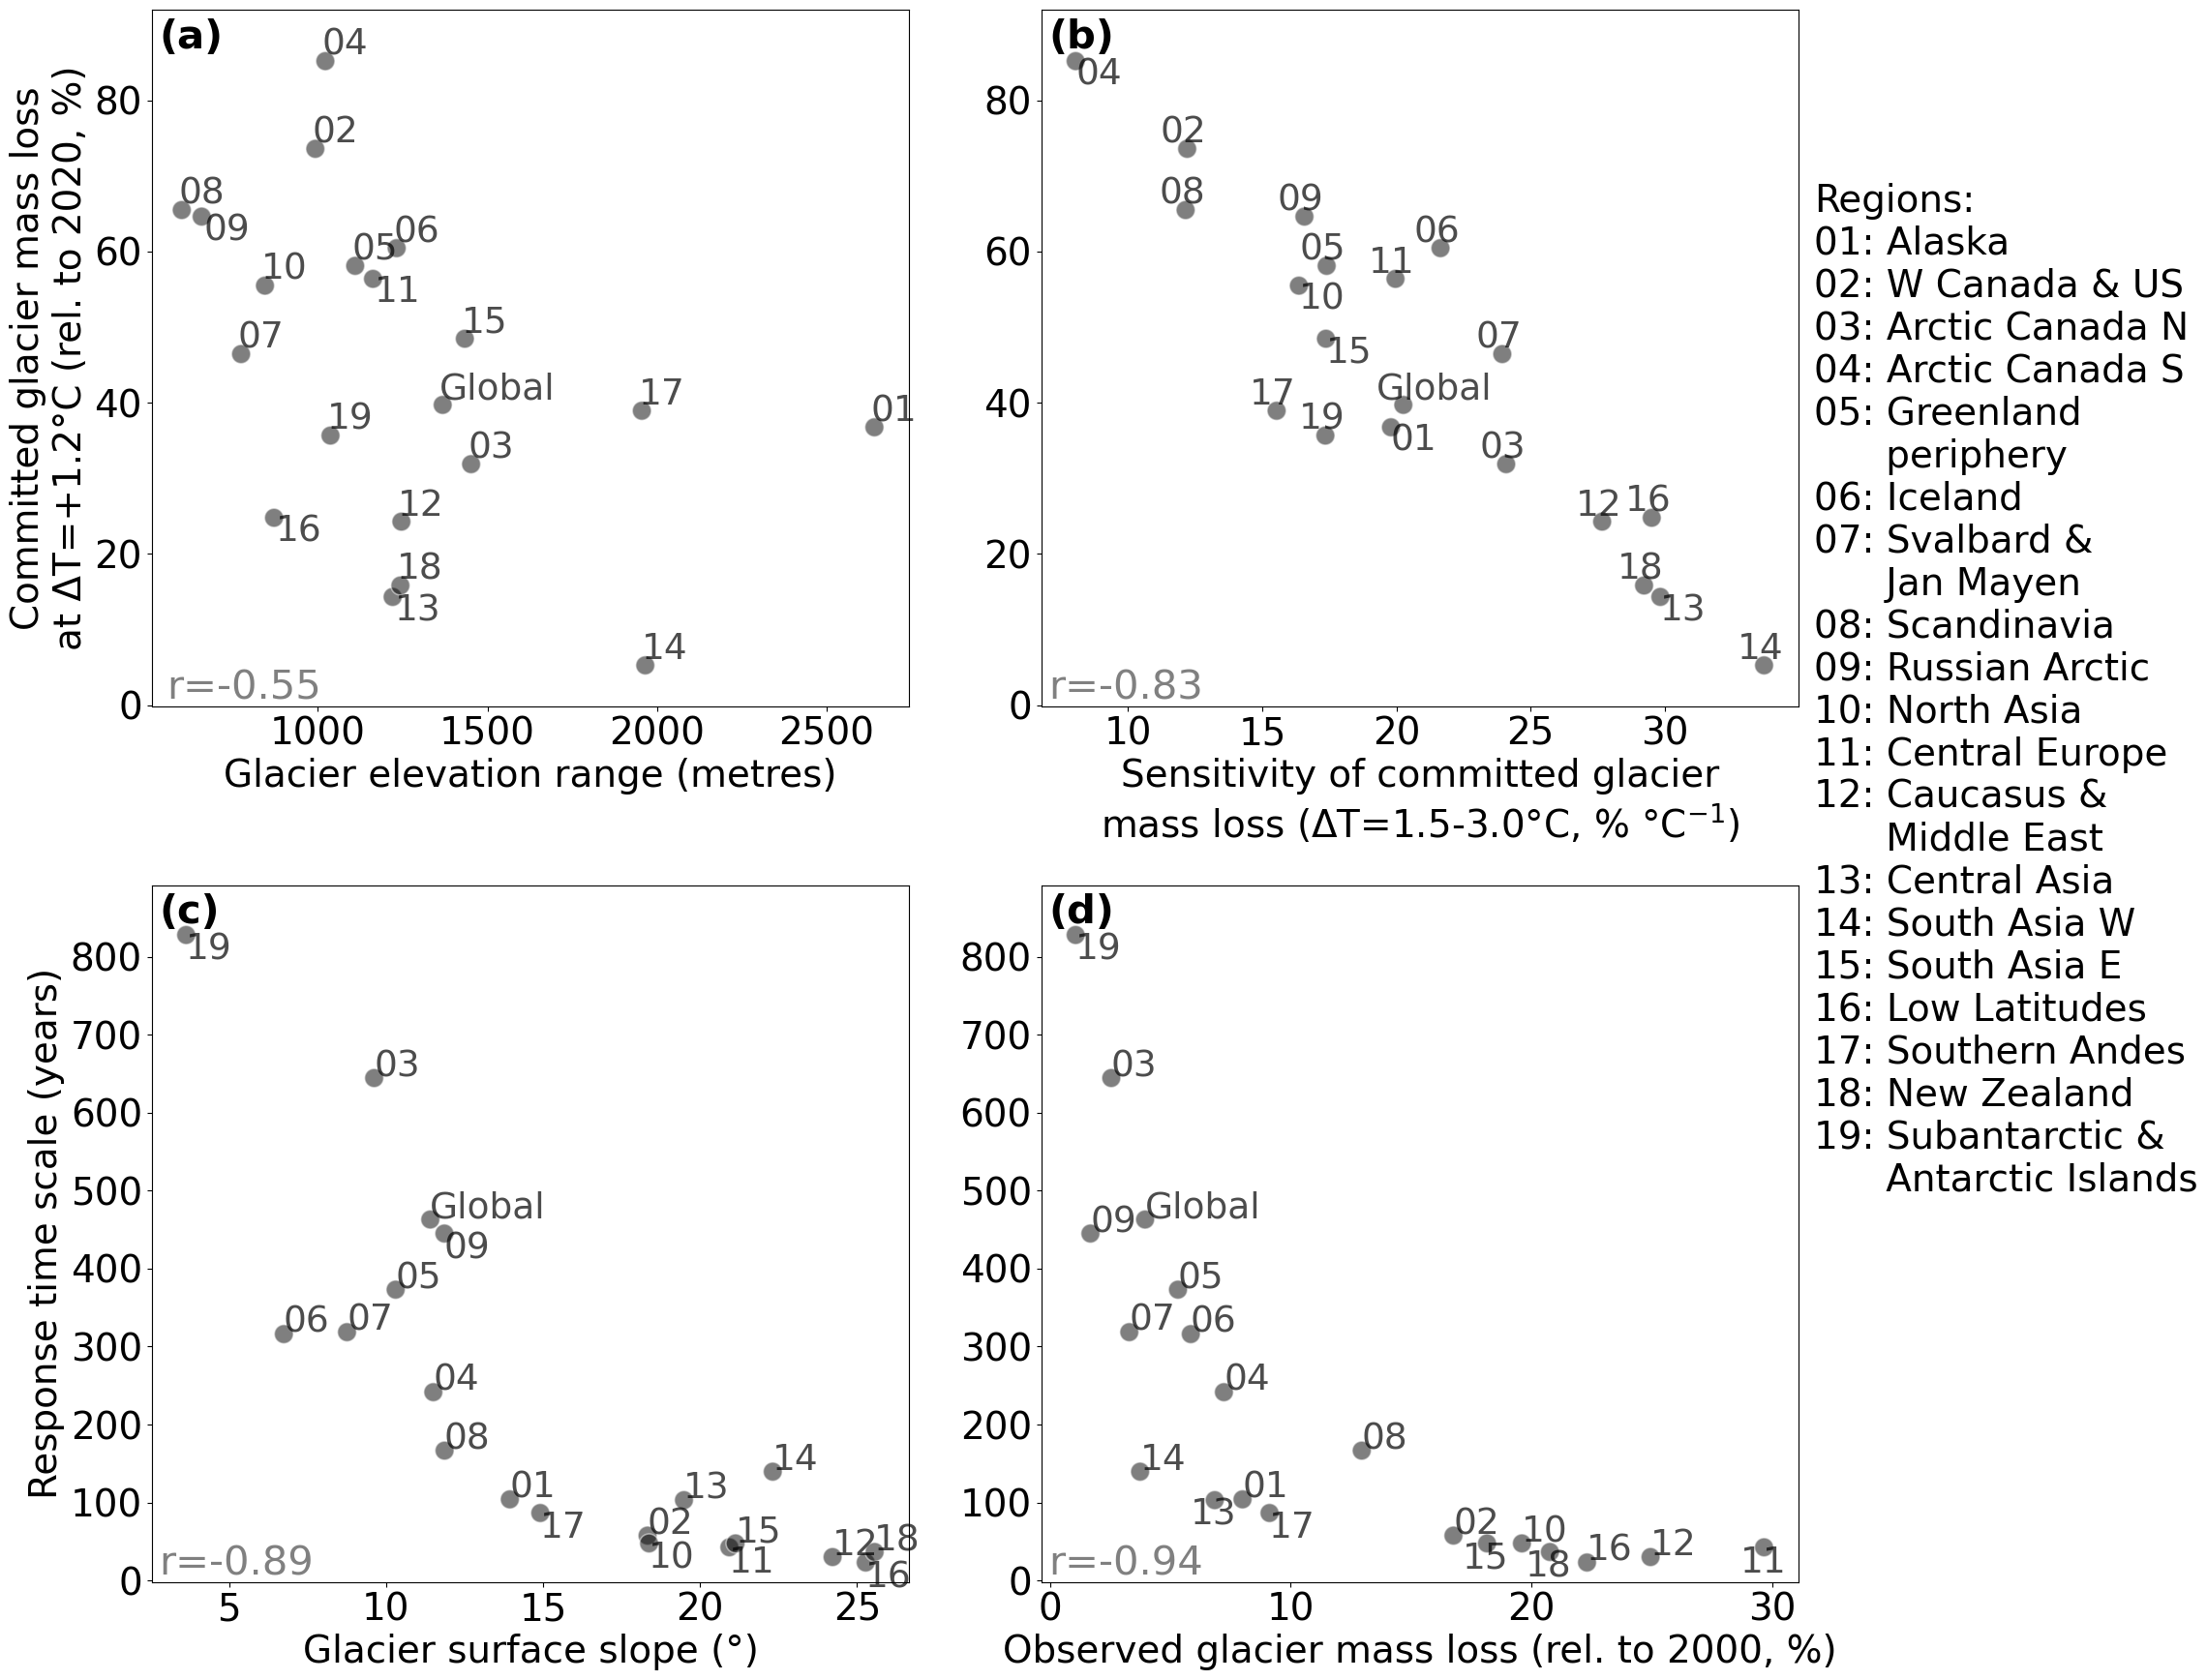

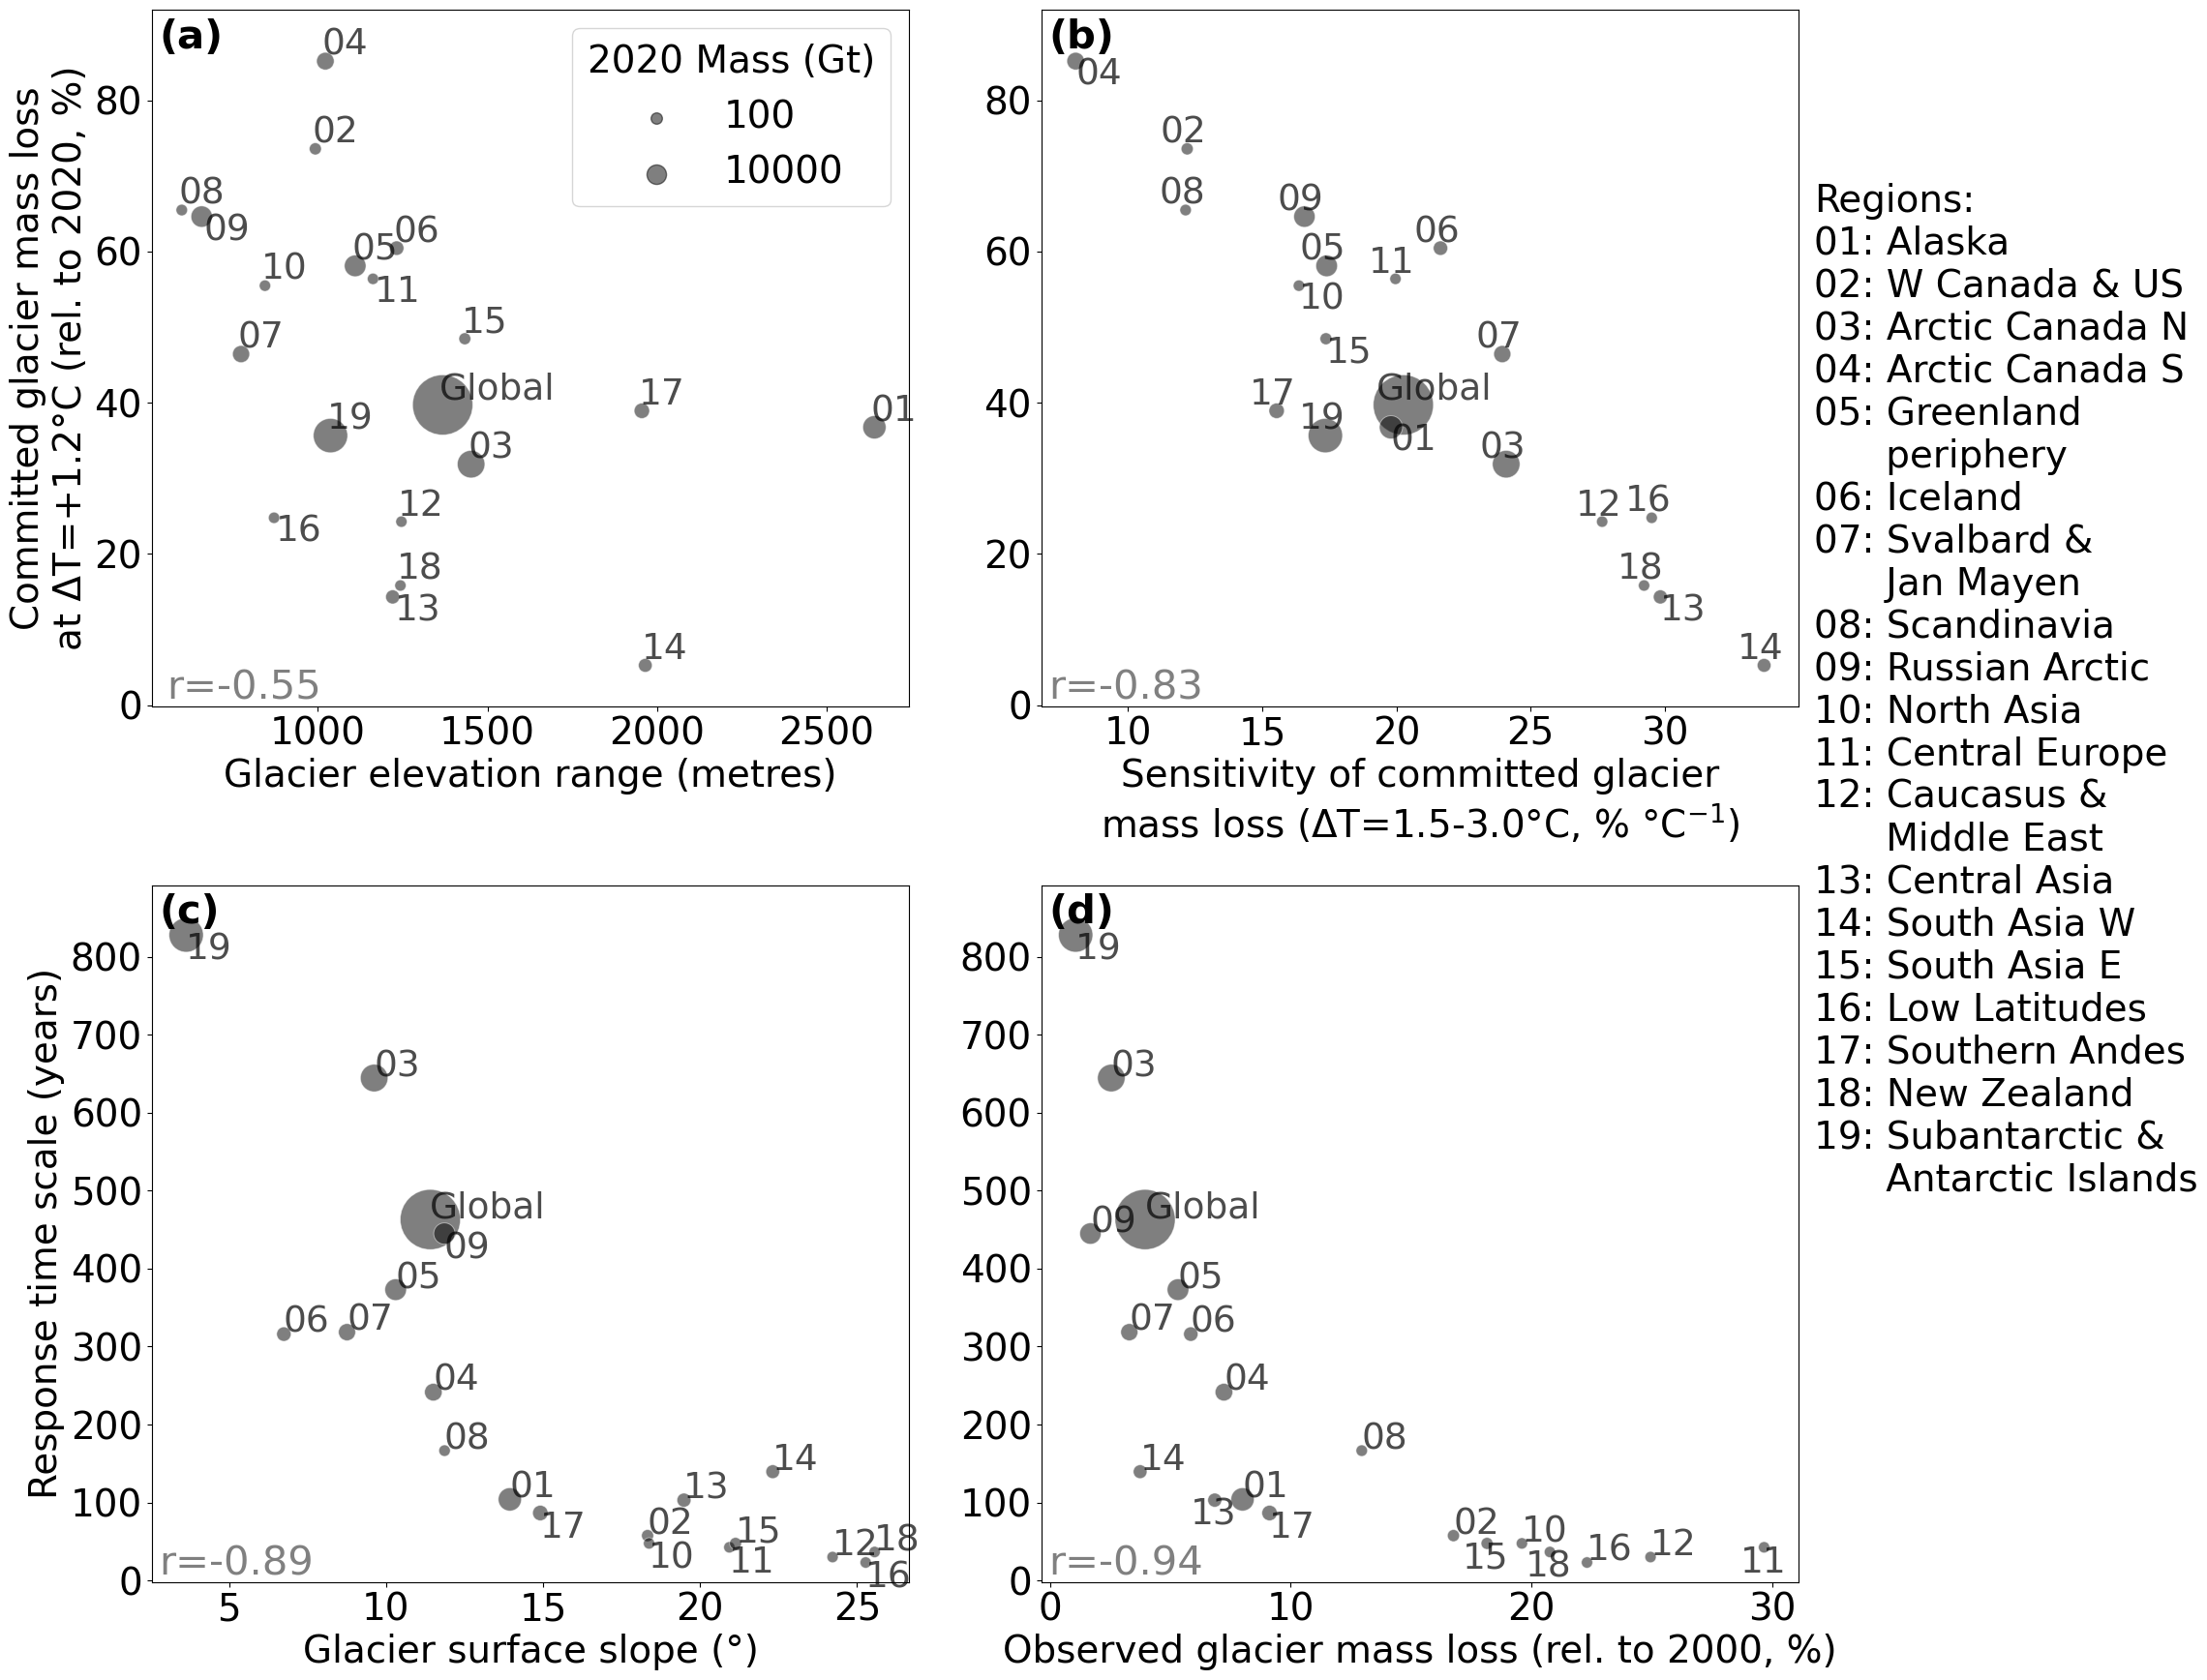

In [48]:
subpanels = False
for changing_size in [False,True]: 
    if changing_size:
        sizes = (70,2000) #2000
        alpha = 0.5
        add ='_changing_size'
    else:
        sizes = (200,200)
        alpha = 0.5#7
        add = ''

    assert (rel_add == '_rel_2020') & (k==3)

    plt.rc('font', size=28)  
    fs_t = 30
    fig,axs = plt.subplots(2,2,figsize=(23,18)) #24
    num_text_x = 0.01
    num_text_y = 0.95
    axs = axs.flatten()
    ###    a)
    ax=axs[0]

    drop_l = ['11','16', '13', '09']
    xx = 'elev_diff_area_weighted'
    #ax.set_xlabel(f'Glacier elevation range\n(glacier-area weighted, metres)') 
    ax.set_xlabel(f'Glacier elevation range (metres)') 

    # \n(in metres, glacier-area weighted)

    yy = f'ice_loss_1.2°C_%{rel_add}'

    if changing_size:
        scatti = sns.scatterplot(data=_pd_lowess_ch,
                                y=yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                                x=xx, sizes=sizes, size='gt_2020_via_5yravg',
                                #hue=f'kmeans_cluster_{k}{rel_add}',
                                #palette=palette_cb[:k],
                                color='black',alpha =alpha,
                                 legend = False, ax = ax) #'full'
        # Get the marker size from the scatterplot
        #size_order = np.sort(scatti.collections[0].get_sizes())
        #handles, labels = ax.get_legend_handles_labels()
        #print(handles)
        #for j,h in enumerate(handles):
        #    marker_size = size_order[j]
        #    h.set_alpha(alpha)
        #    h.set_sizes([marker_size])
        #    if j in [0,10,18]:
        #        print(marker_size)
        #ax.legend([handles[0],handles[9],handles[-1]], [np.round(float(labels[0]),0).astype(int),
         #                                               np.round(float(labels[9]),0).astype(int),
         #                                          np.round(float(labels[-1]),0).astype(int)],
         #           title='2020 Mass (Gt)',
         #           #bbox_to_anchor = (1, 0.35), 
         #           ncol=1, loc='upper right')        
        
        
        size_r = sizes[1] - sizes[0]
        custom_labels = [100, 10000]
        custom_sizes = []
        for c in custom_labels:
            custom_sizes.append(sizes[0] + size_r*(c-min_s)/(max_s-min_s))


        # Create a new set of handles for the custom sizes
        custom_handles = [ax.scatter([], [], s=size, color='black', alpha = alpha) for size in custom_sizes]

        # Remove the original size legend
        #legend_labels = [label for label in labels if label not in custom_labels]
        #legend_handles = [handle for handle, label in zip(handles, labels) if label not in custom_labels]

        # Add the custom size legend
        #legend_handles.extend(custom_handles)
        #legend_labels.extend(custom_labels)

        # Update the legend with the custom sizes
        scatti.legend(custom_handles, custom_labels,
                       title='2020 Mass (Gt)', loc='upper right')
    else:
        scatti = sns.scatterplot(data=_pd_lowess_ch,
                                y=yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                                x=xx, sizes=sizes, size='gt_2020_via_5yravg',
                                #hue=f'kmeans_cluster_{k}{rel_add}',
                                #palette=palette_cb[:k],
                                color='black',alpha =alpha,
                                 legend = False, ax = ax)

    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values, 
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.02,0.01, f'r={corrcoef}', ha='left', # spearman's rho (write rho to clarify that), regine does not like rho, use instead "r"
                transform=ax.transAxes, color='grey', fontsize=fs_t)


    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    _pd_lowess_ch.drop(drop_l).apply(lambda x: plotlabel_0(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[drop_l].apply(lambda x: plotlabel_b0(x[xx],x[yy], x.region, ax=ax), axis=1)
    if rel_add == '_rel_farinotti':
        ax.set_ylabel('Gacier mass loss until steady-state\n(% rel. to Farinotti, ΔT=+1.2°C)') 
    else:
        #ax.set_ylabel('Glacier mass loss until steady-state\n(% rel. to 2020, ΔT=+1.2°C)')  # Steady-state glacier mass loss
        ax.set_ylabel('Committed glacier mass loss\nat ΔT=+1.2°C (rel. to 2020, %)')  # Steady-state glacier mass loss
    
    ##### b)
    ax1 = ax
    ax.set_xlim([510, ax.get_xlim()[-1]])
    ### 
    ax = axs[1]

    temp0 = 1.5
    temp1 = 3.0
    xx=f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC{rel_add}'
    yy=f'ice_loss_1.2°C_%{rel_add}'
    sns.scatterplot(data=_pd_lowess_ch, x= xx,
                    color='black', alpha =alpha,  
                    sizes=sizes,size = 'gt_2020_via_5yravg',
                        y=yy, ax = ax,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                             #palette=palette_cb[:k],
                    legend = False) #False)


    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    #print(corrcoef)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.01,0.01, f'r={corrcoef}', ha='left', # spearman
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    #drop_l_2 = ['01','04','02','07','16','08']
    drop_l_2 = ['01','13','04','10','15']

    _pd_lowess_ch.drop(drop_l_2).apply(lambda x: plotlabel_1(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[drop_l_2].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
    # ax.set_xlabel('Sensitivity of glacier mass loss until steady-state\n'+r'(ΔT=1.5-3.0°C, % °C$^{-1}$)')
    ax.set_xlabel('Sensitivity of committed glacier\nmass loss '+r'(ΔT=1.5-3.0°C, % °C$^{-1}$)')

    #(difference between {np.round(temp0,1)}°C and {np.round(temp1,1)}°C)')
    ax.set_ylabel('')
    #Steady-state glacier mass loss\n(% rel. to 2020, ΔT=1.2°C)') 

    #ax.set_ylabel('Ice loss in steady-state\n(% rel. to initial state, ΔT=+1.2°C)') 
    ################## c)
    ax2=ax
    ##########

    num_text_x = 0.01
    num_text_y = 0.93
    r=1
    c=2
    ax=axs[2]
    yy2='resp_time_-80%_1_5_deg'
    #ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
    #ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'
    ylabel = f'Response time scale (years)'

    xx2 = f'resp_time_-50%_1_5_deg'
    #xlabel2 = r'Years when 50% of change occurs ($\Delta$T=+1.5°C)'
    xlabel2 = f'Year (50%, $\Delta$T=1.5$\pm$0.2°C)'

    xx=f'slope_weighted_area_avg' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    sns.scatterplot(data=_pd_lowess_ch,
                    y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                    x=xx,
                    color='black',alpha =alpha,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                    #palette=palette_cb[:k],
                    #s=200, 
                    sizes=sizes,size = 'gt_2020_via_5yravg',
                    legend = False, ax = ax)
    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.01,0.01, f'r={corrcoef}', ha='left', #spearmanr
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    drop_l_3 = ['11','10','19','16','17', '09']

    _pd_lowess_ch.drop(drop_l_3).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)

    _pd_lowess_ch.loc[['11','10','19','16','17','09']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)
    #_pd_lowess_ch.loc[['09']].apply(lambda x: plotlabelr_l(x[xx],x[yy], x.region, ax=ax), axis=1)


    ax.set_ylabel(ylabel)

    #ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted average, °)') #\n(regional glacier-area weighted average, in °)')
    ax.set_xlabel(f'Glacier surface slope (°)') #\n(glacier-area weighted average, °)') #\n(regional glacier-area weighted average, in °)')

    if subpanels:
        inset_ax = inset_axes(ax,
                            width="43%", # width = 30% of parent_bbox
                            height="47%", # height : 1 inch
                            loc='upper right',
                            #bbox_to_anchor=(1, 0.9, 0, 0),
                               )
        #inset_ax.set_title(' t\n t', alpha =0)
        sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                                      sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
                       )
        inset_ax.set_xlabel(xlabel2+ '     ', fontsize=22) #'Year (50%)')
        inset_ax.set_ylabel(ylabel + '     ', fontsize=22) #'Year (80%)') 
        #_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
        inset_ax.text(num_text_x, num_text_y*0.94,
                 num_dict[3], weight='bold', fontsize=32, transform=inset_ax.transAxes)

        #plt.text(0.99, 0.99,
        #         'R²=0.96', fontsize=22, color='grey', va='top', ha='right',
        #         transform=inset_ax.transAxes)
        #plt.ylim([-2,840])
        #inset_ax.grid(alpha=0.5)

        inset_ax.set_aspect('equal')
        ylim0,ylim1 = inset_ax.get_ylim()
        xlim0,xlim1 = inset_ax.get_xlim()
        lim0 = min(ylim0, xlim0)
        lim1 = max(ylim1, xlim1)
        inset_ax.set_xlim([lim0, lim1])
        inset_ax.set_ylim([lim0, lim1])

        inset_ax.set_xticks(np.arange(0,lim1,300))
        inset_ax.set_yticks(np.arange(0,lim1,300))

        #inset_ax.text(0.98,0.02,
        #              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n80% vs\n50% of\nchanges", 
        #              fontsize=24,
        #     transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
        #inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)

        #############
        slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                                      _df[yy2])
        ylim = inset_ax.get_ylim()
        x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
        inset_ax.plot(x_range,slope*x_range + intercept, 
                      color = 'black', alpha = 0.5, lw=4)
        ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
        #print('ratio:', ratio, 'slope:' , slope)
        inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n80% than\n50% of\nchanges",
                          xy=(150,slope*150 + intercept),
                          xytext=(450,5),
                          fontsize = 24,
                          arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                          color='grey') #, alpha1)
        inset_ax.set_ylim(ylim)
    ax3=ax

    ##############################################
    ax = axs[3]
    
    yy2='resp_time_-80%_1_5_deg'
    #ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'
    ylabel = f'Response time scale (years)'

    #s when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
    xx2 = f'resp_time_-80%_3_0_deg'

    xx=f'20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    sns.scatterplot(data=  _pd_lowess_ch,
                    y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                    x=xx,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                    color='black',alpha =alpha,
                    s=200,
                    #palette=palette_cb[:k], s=200,
                    size = 'gt_2020_via_5yravg',
                    sizes=sizes,
                    legend = False, ax=ax)


    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.01,0.01, f'r={corrcoef}', ha='left', #spearmanr
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    #pd_lowess_ch.drop(['05','04','11','07','16','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
    #pd_lowess_ch.loc[['05','04','11','07','16','13']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.drop(['19','17','18','15','13','11']).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['19','17']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['18','15','13','11']].apply(lambda x: plotlabel_bbl(x[xx],x[yy], x.region, ax=ax), axis=1)

    ax.set_ylabel(ylabel)

    #ax.set_xlabel(f'Observed glacier mass loss\n(2000-2019 rel. to 2000, %)') # end of 2019
    ax.set_xlabel(f'Observed glacier mass loss (rel. to 2000, %)') # end of 2019 ### 2000-2019 
    
    if subpanels:

        inset_ax = inset_axes(ax,
                            width="43%", # width = 30% of parent_bbox
                            height="47%", # height : 1 inch
                            loc='upper right',
                            #bbox_to_anchor=(1, 0.9, 0, 0),
                               )
        #inset_ax.set_title(' t\n t', alpha =0)
        sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                       sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
                       )

        inset_ax.set_xlabel(r'Year (80%, $\Delta$T=3.0$\pm$0.2°C)'+ '     ', fontsize=22)#, fontsize=20)
        inset_ax.set_ylabel(r'Year (80%, $\Delta$T=1.5$\pm$0.2°C)' + '     ', fontsize=22)#, fontsize=20) 
        inset_ax.text(num_text_x, num_text_y*0.94,
                 num_dict[5], weight='bold',fontsize=32, transform=inset_ax.transAxes)
        #_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
        #inset_ax.text(num_text_x, num_text_y*0.9,
        #         num_dict[4], fontsize=26, transform=inset_ax.transAxes)

        #plt.text(0.99, 0.99,
        #         'R²=0.96',
        #         fontsize=22, color='grey', va='top', ha='right',
        #         transform=inset_ax.transAxes)
        #plt.ylim([-2,840])
        #inset_ax.grid(alpha=0.5)

        inset_ax.set_aspect('equal')
        ylim0,ylim1 = inset_ax.get_ylim()
        xlim0,xlim1 = inset_ax.get_xlim()
        lim0 = min(ylim0, xlim0)
        lim1 = max(ylim1, xlim1)
        inset_ax.set_xlim([lim0, lim1])
        inset_ax.set_ylim([lim0, lim1])

        inset_ax.set_xticks(np.arange(0,lim1,300))
        inset_ax.set_yticks(np.arange(0,lim1,300))
        #inset_ax.text(0.98,0.02, 
        #              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n1.5°C vs\n3.0°C", fontsize=24,
        # transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
        #inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)
        slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                                      _df[yy2])
        ylim = inset_ax.get_ylim()
        x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
        inset_ax.plot(x_range,slope*x_range + intercept, 
                      color = 'black', alpha = 0.5, lw=4)
        ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
        #print('ratio:', ratio, 'slope:' , slope)
        inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n1.5°C than\n3.0°C", 
                          #times\nlonger for\n80% vs\n50% of\nchanges",
                          xy=(150,slope*150 + intercept),
                          xytext=(410,5),
                          fontsize = 24,
                          arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                          color='grey') #, alpha1)
        inset_ax.set_ylim(ylim)


    ax4=ax

    ############
    num_text_x = 0.01
    for j,axi in enumerate([ax1, ax2,ax3,ax4]):
        num_text_y = 0.945
        if j==3 and subpanels:
            jj = j+1
        else:
            jj = j
        axi.text(num_text_x, num_text_y,
                 num_dict[jj], fontsize=30, weight='bold',transform=axi.transAxes)
        if j>=2:
            axi.set_ylim([-2,892])
        else:
            axi.set_ylim([-0.2,92])
        if j in [1,3]:
            axi.set_ylabel('')
            #axi.set_yticklabels([]) 
        #if j<3:
        #    axi.set_ylim(ax1.get_ylim())
    #plt.savefig(f'figures/fig4_{DATE}.png')
    #plt.savefig(f'figures/fig4_{DATE}.pdf')
    plt.tight_layout(rect=(0,0,0.84,1))


    ax.text(1.02, 0.5, 'Regions:\n'+ legend_text, transform=ax.transAxes, #weight='bold',
            fontsize=28)

    plt.savefig(f'figures/fig4{add}_subpanel{subpanels}_wglobal.png')
    plt.savefig(f'figures/fig4{add}_subpanel{subpanels}_wglobal.pdf')

### Experimental - w. global mean temp. change

In [40]:
import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_diverging',
    [
        (0, 'blue'),       # Blue for values far below 1
        #(0.25, 'dodgerblue'), # Brighter blue closer to 1
        #(0.4,'dodgerblue'),
        (0.5, 'orange'),       # Neutral gray at exactly 1
        #(0.6,'orange'),
        #(0.75, 'indianred'), # Brighter red closer to 1
        (1, 'red')          # Red for values far above 1
    ]
)
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_diverging',
    [
        (0, 'blue'),       # Blue for values far below 1
        #(0.25, 'dodgerblue'), # Brighter blue closer to 1
        (0.45,'dodgerblue'),
        (0.5, 'grey'),       # Neutral gray at exactly 1
        (0.55,'orange'),
        #(0.75, 'indianred'), # Brighter red closer to 1
        (1, 'red')          # Red for values far above 1
    ]
)

cmap = sns.color_palette("coolwarm", as_cmap=True)
####cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True) ### does not work so well
# Normalize the hue values around 1
norm = mcolors.TwoSlopeNorm(vmin=1/_pd_lowess_ch.median_reg_vs_glob_ch.values.max(),
                            vcenter=_pd_lowess_ch.loc['Global'].median_reg_vs_glob_ch,
                            vmax=_pd_lowess_ch.median_reg_vs_glob_ch.values.max())

pval 0.01450849826103622
pval 1.108185789375772e-05
pval 2.4425413626605395e-07
pval 2.353290129320101e-09


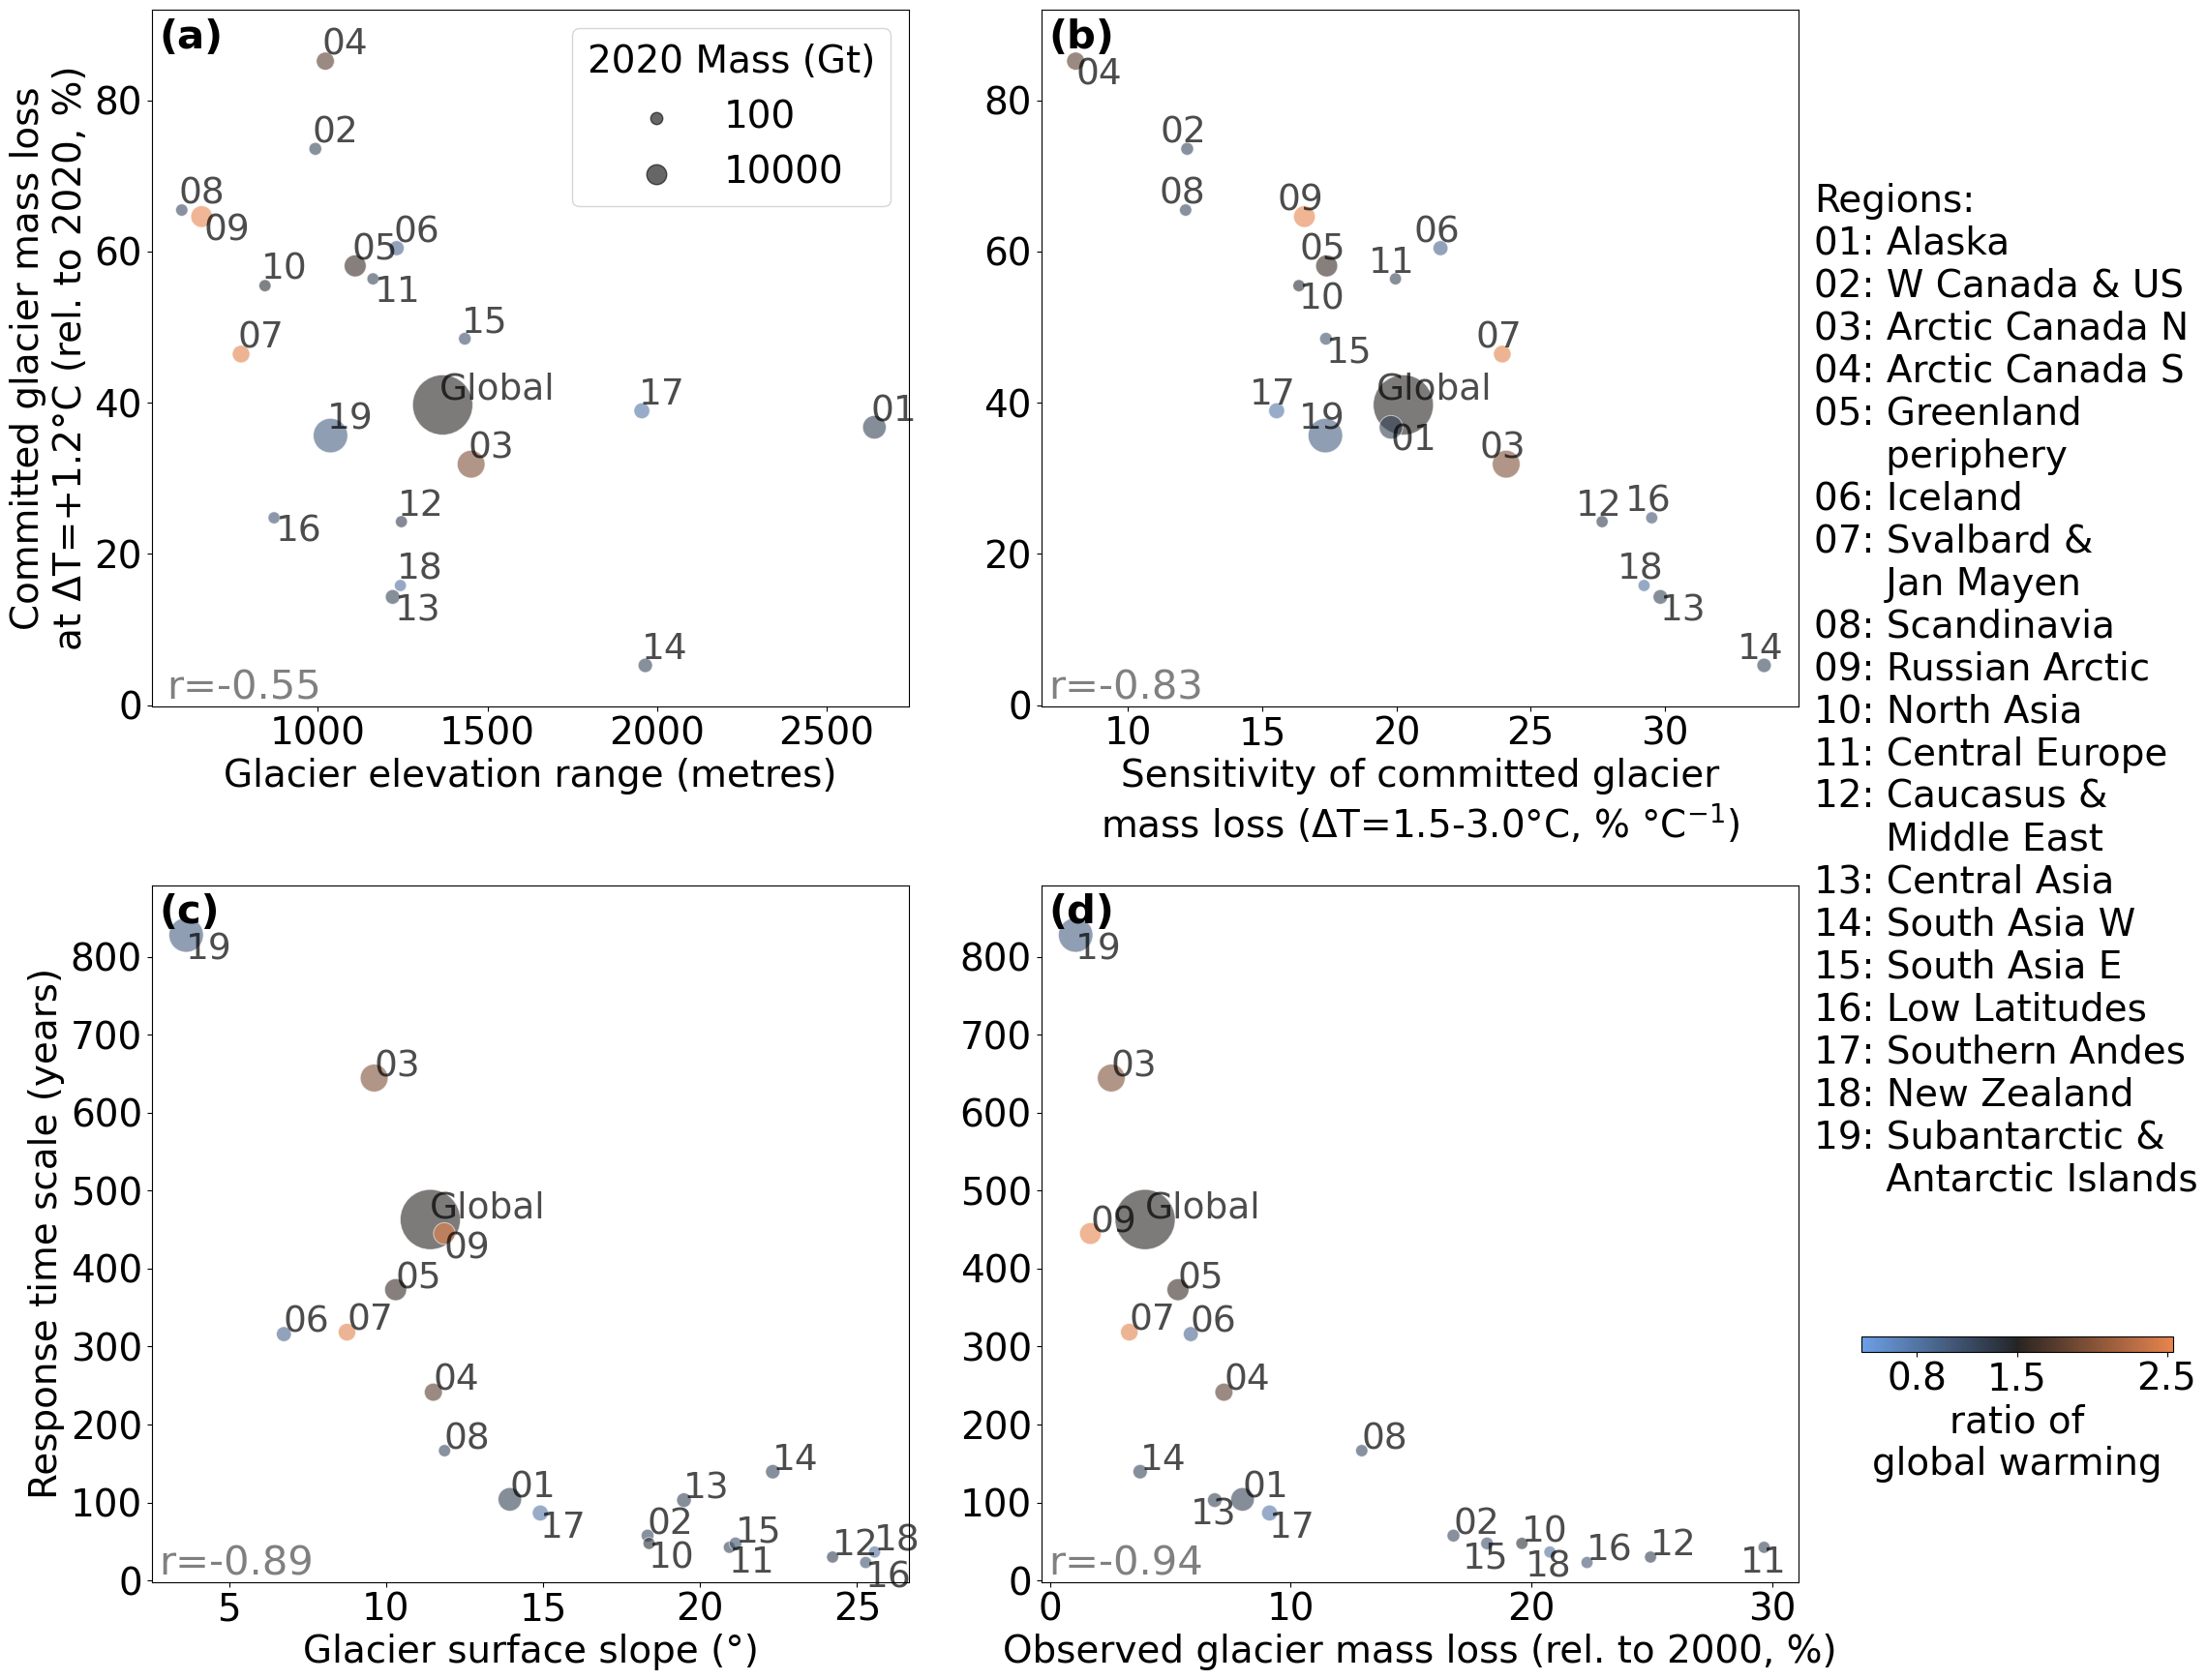

In [42]:
subpanels = False
for changing_size in [True]: 
    if changing_size:
        sizes = (80,2000)
        alpha = 0.9
        add ='_changing_size'
    else:
        sizes = (200,200)
        alpha = 0.5#7
        add = ''

    assert (rel_add == '_rel_2020') & (k==3)

    plt.rc('font', size=28)  
    fs_t = 30
    fig,axs = plt.subplots(2,2,figsize=(23,18)) #24
    num_text_x = 0.01
    num_text_y = 0.95
    axs = axs.flatten()
    ###    a)
    ax=axs[0]

    drop_l = ['11','16', '13', '09']
    xx = 'elev_diff_area_weighted'
    #ax.set_xlabel(f'Glacier elevation range\n(glacier-area weighted, metres)') 
    ax.set_xlabel(f'Glacier elevation range (metres)') 

    # \n(in metres, glacier-area weighted)

    yy = f'ice_loss_1.2°C_%{rel_add}'

    if changing_size:
        scatti = sns.scatterplot(data=_pd_lowess_ch,
                                 hue='median_reg_vs_glob_ch',
                                 palette=cmap, 
                                hue_norm=norm,
                                y=yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                                x=xx, sizes=sizes, size='gt_2020_via_5yravg',
                                #hue=f'kmeans_cluster_{k}{rel_add}',
                                #palette=palette_cb[:k],
                                color='black',alpha =alpha,
                                 legend = False, ax = ax) #'full'
        # Get the marker size from the scatterplot
        #size_order = np.sort(scatti.collections[0].get_sizes())
        #handles, labels = ax.get_legend_handles_labels()
        #print(handles)
        #for j,h in enumerate(handles):
        #    marker_size = size_order[j]
        #    h.set_alpha(alpha)
        #    h.set_sizes([marker_size])
        #    if j in [0,10,18]:
        #        print(marker_size)
        #ax.legend([handles[0],handles[9],handles[-1]], [np.round(float(labels[0]),0).astype(int),
         #                                               np.round(float(labels[9]),0).astype(int),
         #                                          np.round(float(labels[-1]),0).astype(int)],
         #           title='2020 Mass (Gt)',
         #           #bbox_to_anchor = (1, 0.35), 
         #           ncol=1, loc='upper right')        
        
        
        size_r = sizes[1] - sizes[0]
        custom_labels = [100, 10000]
        custom_sizes = []
        for c in custom_labels:
            custom_sizes.append(sizes[0] + size_r*(c-min_s)/(max_s-min_s))


        # Create a new set of handles for the custom sizes
        custom_handles = [ax.scatter([], [], s=size, color='black', alpha = alpha) for size in custom_sizes]

        # Remove the original size legend
        #legend_labels = [label for label in labels if label not in custom_labels]
        #legend_handles = [handle for handle, label in zip(handles, labels) if label not in custom_labels]

        # Add the custom size legend
        #legend_handles.extend(custom_handles)
        #legend_labels.extend(custom_labels)

        # Update the legend with the custom sizes
        scatti.legend(custom_handles, custom_labels,
                       title='2020 Mass (Gt)', loc='upper right')
    else:
        scatti = sns.scatterplot(data=_pd_lowess_ch,
                                 hue='median_reg_vs_glob_ch',
                                 palette=cmap, 
                                hue_norm=norm,
                                y=yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                                x=xx, sizes=sizes, size='gt_2020_via_5yravg',
                                #hue=f'kmeans_cluster_{k}{rel_add}',
                                #palette=palette_cb[:k],
                                color='black',alpha =alpha,
                                 legend = False, ax = ax)

    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values, 
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.02,0.01, f'r={corrcoef}', ha='left', # spearman's rho (write rho to clarify that), regine does not like rho, use instead "r"
                transform=ax.transAxes, color='grey', fontsize=fs_t)


    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    _pd_lowess_ch.drop(drop_l).apply(lambda x: plotlabel_0(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[drop_l].apply(lambda x: plotlabel_b0(x[xx],x[yy], x.region, ax=ax), axis=1)
    if rel_add == '_rel_farinotti':
        ax.set_ylabel('Gacier mass loss until steady-state\n(% rel. to Farinotti, ΔT=+1.2°C)') 
    else:
        #ax.set_ylabel('Glacier mass loss until steady-state\n(% rel. to 2020, ΔT=+1.2°C)')  # Steady-state glacier mass loss
        ax.set_ylabel('Committed glacier mass loss\nat ΔT=+1.2°C (rel. to 2020, %)')  # Steady-state glacier mass loss
    
    ##### b)
    ax1 = ax
    ax.set_xlim([510, ax.get_xlim()[-1]])
    ### 
    ax = axs[1]

    temp0 = 1.5
    temp1 = 3.0
    xx=f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC{rel_add}'
    yy=f'ice_loss_1.2°C_%{rel_add}'
    sns.scatterplot(data=_pd_lowess_ch, x= xx,
                    color='black', alpha =alpha,  
                    hue='median_reg_vs_glob_ch',
                                 palette=cmap, 
                                hue_norm=norm,
                    sizes=sizes,size = 'gt_2020_via_5yravg',
                        y=yy, ax = ax,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                             #palette=palette_cb[:k],
                    legend = False) #False)


    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    #print(corrcoef)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.01,0.01, f'r={corrcoef}', ha='left', # spearman
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    #drop_l_2 = ['01','04','02','07','16','08']
    drop_l_2 = ['01','13','04','10','15']

    _pd_lowess_ch.drop(drop_l_2).apply(lambda x: plotlabel_1(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[drop_l_2].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
    # ax.set_xlabel('Sensitivity of glacier mass loss until steady-state\n'+r'(ΔT=1.5-3.0°C, % °C$^{-1}$)')
    ax.set_xlabel('Sensitivity of committed glacier\nmass loss '+r'(ΔT=1.5-3.0°C, % °C$^{-1}$)')

    #(difference between {np.round(temp0,1)}°C and {np.round(temp1,1)}°C)')
    ax.set_ylabel('')
    #Steady-state glacier mass loss\n(% rel. to 2020, ΔT=1.2°C)') 

    #ax.set_ylabel('Ice loss in steady-state\n(% rel. to initial state, ΔT=+1.2°C)') 
    ################## c)
    ax2=ax
    ##########

    num_text_x = 0.01
    num_text_y = 0.93
    r=1
    c=2
    ax=axs[2]
    yy2='resp_time_-80%_1_5_deg'
    #ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
    #ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'
    ylabel = f'Response time scale (years)'

    xx2 = f'resp_time_-50%_1_5_deg'
    #xlabel2 = r'Years when 50% of change occurs ($\Delta$T=+1.5°C)'
    xlabel2 = f'Year (50%, $\Delta$T=1.5$\pm$0.2°C)'

    xx=f'slope_weighted_area_avg' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    sns.scatterplot(data=_pd_lowess_ch,
                    hue='median_reg_vs_glob_ch',
                     palette=cmap, 
                    hue_norm=norm,
                    y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                    x=xx,
                    color='black',alpha =alpha,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                    #palette=palette_cb[:k],
                    #s=200, 
                    sizes=sizes,size = 'gt_2020_via_5yravg',
                    legend = False, ax = ax)
    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.01,0.01, f'r={corrcoef}', ha='left', #spearmanr
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    drop_l_3 = ['11','10','19','16','17', '09']

    _pd_lowess_ch.drop(drop_l_3).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)

    _pd_lowess_ch.loc[['11','10','19','16','17','09']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)
    #_pd_lowess_ch.loc[['09']].apply(lambda x: plotlabelr_l(x[xx],x[yy], x.region, ax=ax), axis=1)


    ax.set_ylabel(ylabel)

    #ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted average, °)') #\n(regional glacier-area weighted average, in °)')
    ax.set_xlabel(f'Glacier surface slope (°)') #\n(glacier-area weighted average, °)') #\n(regional glacier-area weighted average, in °)')

    if subpanels:
        inset_ax = inset_axes(ax,
                            width="43%", # width = 30% of parent_bbox
                            height="47%", # height : 1 inch
                            loc='upper right',
                            #bbox_to_anchor=(1, 0.9, 0, 0),
                               )
        #inset_ax.set_title(' t\n t', alpha =0)
        sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                                      sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
                       )
        inset_ax.set_xlabel(xlabel2+ '     ', fontsize=22) #'Year (50%)')
        inset_ax.set_ylabel(ylabel + '     ', fontsize=22) #'Year (80%)') 
        #_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
        inset_ax.text(num_text_x, num_text_y*0.94,
                 num_dict[3], weight='bold', fontsize=32, transform=inset_ax.transAxes)

        #plt.text(0.99, 0.99,
        #         'R²=0.96', fontsize=22, color='grey', va='top', ha='right',
        #         transform=inset_ax.transAxes)
        #plt.ylim([-2,840])
        #inset_ax.grid(alpha=0.5)

        inset_ax.set_aspect('equal')
        ylim0,ylim1 = inset_ax.get_ylim()
        xlim0,xlim1 = inset_ax.get_xlim()
        lim0 = min(ylim0, xlim0)
        lim1 = max(ylim1, xlim1)
        inset_ax.set_xlim([lim0, lim1])
        inset_ax.set_ylim([lim0, lim1])

        inset_ax.set_xticks(np.arange(0,lim1,300))
        inset_ax.set_yticks(np.arange(0,lim1,300))

        #inset_ax.text(0.98,0.02,
        #              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n80% vs\n50% of\nchanges", 
        #              fontsize=24,
        #     transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
        #inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)

        #############
        slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                                      _df[yy2])
        ylim = inset_ax.get_ylim()
        x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
        inset_ax.plot(x_range,slope*x_range + intercept, 
                      color = 'black', alpha = 0.5, lw=4)
        ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
        #print('ratio:', ratio, 'slope:' , slope)
        inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n80% than\n50% of\nchanges",
                          xy=(150,slope*150 + intercept),
                          xytext=(450,5),
                          fontsize = 24,
                          arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                          color='grey') #, alpha1)
        inset_ax.set_ylim(ylim)
    ax3=ax

    ##############################################
    ax = axs[3]
    
    yy2='resp_time_-80%_1_5_deg'
    #ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'
    ylabel = f'Response time scale (years)'

    #s when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
    xx2 = f'resp_time_-80%_3_0_deg'

    xx=f'20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    sns.scatterplot(data=  _pd_lowess_ch,
                    hue='median_reg_vs_glob_ch',
                                 palette=cmap, 
                                hue_norm=norm,
                    y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                    x=xx,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                    color='black',alpha =alpha,
                    s=200,
                    #palette=palette_cb[:k], s=200,
                    size = 'gt_2020_via_5yravg',
                    sizes=sizes,
                    legend = True, ax=ax)

    han,lab = ax.get_legend_handles_labels()
    ax.legend().remove()
    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch.drop(index='Global')[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        print('pval',pval)
        ax.text(0.01,0.01, f'r={corrcoef}', ha='left', #spearmanr
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    #pd_lowess_ch.drop(['05','04','11','07','16','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
    #pd_lowess_ch.loc[['05','04','11','07','16','13']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.drop(['19','17','18','15','13','11']).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['19','17']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['18','15','13','11']].apply(lambda x: plotlabel_bbl(x[xx],x[yy], x.region, ax=ax), axis=1)

    ax.set_ylabel(ylabel)

    #ax.set_xlabel(f'Observed glacier mass loss\n(2000-2019 rel. to 2000, %)') # end of 2019
    ax.set_xlabel(f'Observed glacier mass loss (rel. to 2000, %)') # end of 2019 ### 2000-2019 
    
    if subpanels:

        inset_ax = inset_axes(ax,
                            width="43%", # width = 30% of parent_bbox
                            height="47%", # height : 1 inch
                            loc='upper right',
                            #bbox_to_anchor=(1, 0.9, 0, 0),
                               )
        #inset_ax.set_title(' t\n t', alpha =0)
        sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                       sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
                       )

        inset_ax.set_xlabel(r'Year (80%, $\Delta$T=3.0$\pm$0.2°C)'+ '     ', fontsize=22)#, fontsize=20)
        inset_ax.set_ylabel(r'Year (80%, $\Delta$T=1.5$\pm$0.2°C)' + '     ', fontsize=22)#, fontsize=20) 
        inset_ax.text(num_text_x, num_text_y*0.94,
                 num_dict[5], weight='bold',fontsize=32, transform=inset_ax.transAxes)
        #_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
        #inset_ax.text(num_text_x, num_text_y*0.9,
        #         num_dict[4], fontsize=26, transform=inset_ax.transAxes)

        #plt.text(0.99, 0.99,
        #         'R²=0.96',
        #         fontsize=22, color='grey', va='top', ha='right',
        #         transform=inset_ax.transAxes)
        #plt.ylim([-2,840])
        #inset_ax.grid(alpha=0.5)

        inset_ax.set_aspect('equal')
        ylim0,ylim1 = inset_ax.get_ylim()
        xlim0,xlim1 = inset_ax.get_xlim()
        lim0 = min(ylim0, xlim0)
        lim1 = max(ylim1, xlim1)
        inset_ax.set_xlim([lim0, lim1])
        inset_ax.set_ylim([lim0, lim1])

        inset_ax.set_xticks(np.arange(0,lim1,300))
        inset_ax.set_yticks(np.arange(0,lim1,300))
        #inset_ax.text(0.98,0.02, 
        #              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n1.5°C vs\n3.0°C", fontsize=24,
        # transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
        #inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)
        slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                                      _df[yy2])
        ylim = inset_ax.get_ylim()
        x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
        inset_ax.plot(x_range,slope*x_range + intercept, 
                      color = 'black', alpha = 0.5, lw=4)
        ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
        #print('ratio:', ratio, 'slope:' , slope)
        inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n1.5°C than\n3.0°C", 
                          #times\nlonger for\n80% vs\n50% of\nchanges",
                          xy=(150,slope*150 + intercept),
                          xytext=(410,5),
                          fontsize = 24,
                          arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                          color='grey') #, alpha1)
        inset_ax.set_ylim(ylim)


    ax4=ax

    ############
    num_text_x = 0.01
    for j,axi in enumerate([ax1, ax2,ax3,ax4]):
        num_text_y = 0.945
        if j==3 and subpanels:
            jj = j+1
        else:
            jj = j
        axi.text(num_text_x, num_text_y,
                 num_dict[jj], fontsize=30, weight='bold',transform=axi.transAxes)
        if j>=2:
            axi.set_ylim([-2,892])
        else:
            axi.set_ylim([-0.2,92])
        if j in [1,3]:
            axi.set_ylabel('')
            #axi.set_yticklabels([]) 
        #if j<3:
        #    axi.set_ylim(ax1.get_ylim())
    #plt.savefig(f'figures/fig4_{DATE}.png')
    #plt.savefig(f'figures/fig4_{DATE}.pdf')
    plt.tight_layout(rect=(0,0,0.84,1))

    #ax.legend(han[1:7], lab[1:7], loc='lower left',ncols=2,
    #          bbox_to_anchor=(1.01,0.02), title='Factor of\nglobal warming')
    ax.text(1.02, 0.5, 'Regions:\n'+ legend_text, transform=ax.transAxes, #weight='bold',
            fontsize=28)

    # Adding a color bar to represent the colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar_ax = fig.add_axes([0.85, 0.2, 0.14, 0.1])  # [left, bottom, width, height]
    cbar = plt.colorbar(sm, ax=cbar_ax, orientation='horizontal', shrink=1, label='ratio of\nglobal warming')
    cbar.set_ticks([hue_values.min().round(1), _pd_lowess_ch.loc['Global'].median_reg_vs_glob_ch, hue_values.max().round(1)])
    cbar.set_ticklabels([f"{hue_values.min().round(1):.1f}", _pd_lowess_ch.loc['Global'].median_reg_vs_glob_ch.round(1), f"{hue_values.max().round(1):.1f}"])
    cbar_ax.axis('off')
    #sm.set_clim(hue_values.min(), hue_values.max())
    plt.savefig(f'figures/fig4{add}_subpanel{subpanels}_wglobal_w_warming_ratio.png')
    plt.savefig(f'figures/fig4{add}_subpanel{subpanels}_wglobal_w_warming_ratio.pdf')

### OLD

-0.8298245614035088
-0.8298245614035088


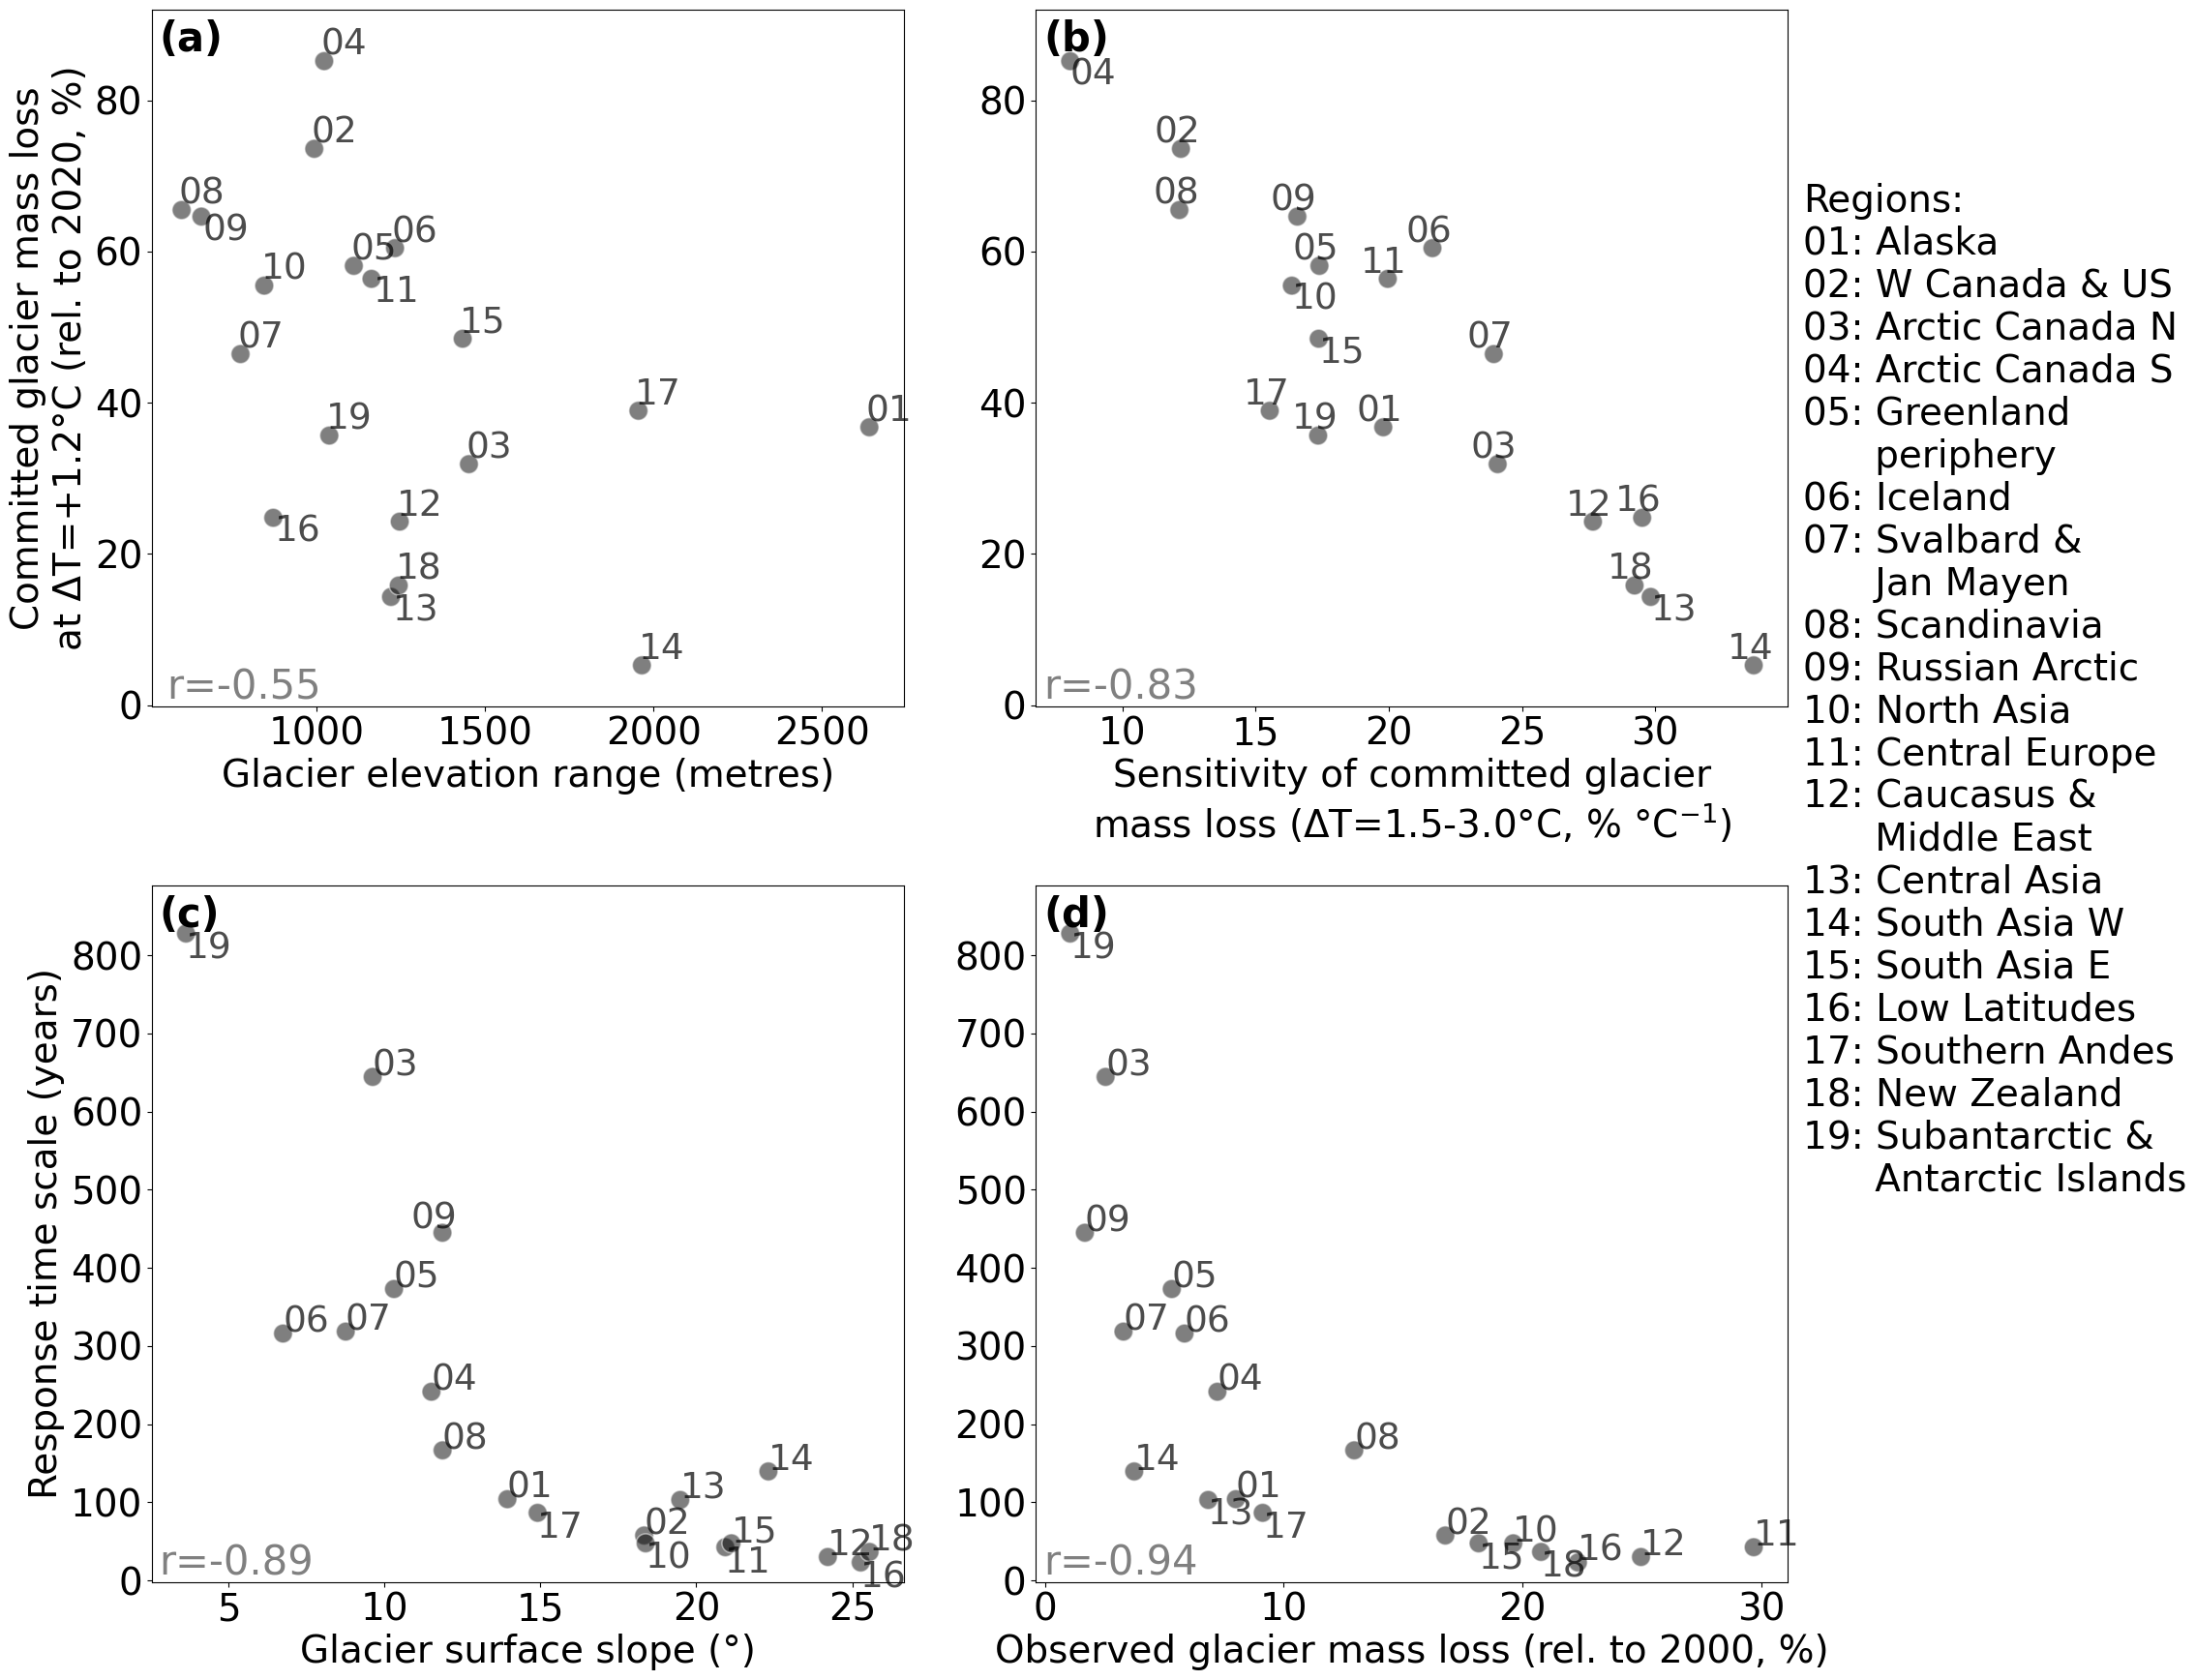

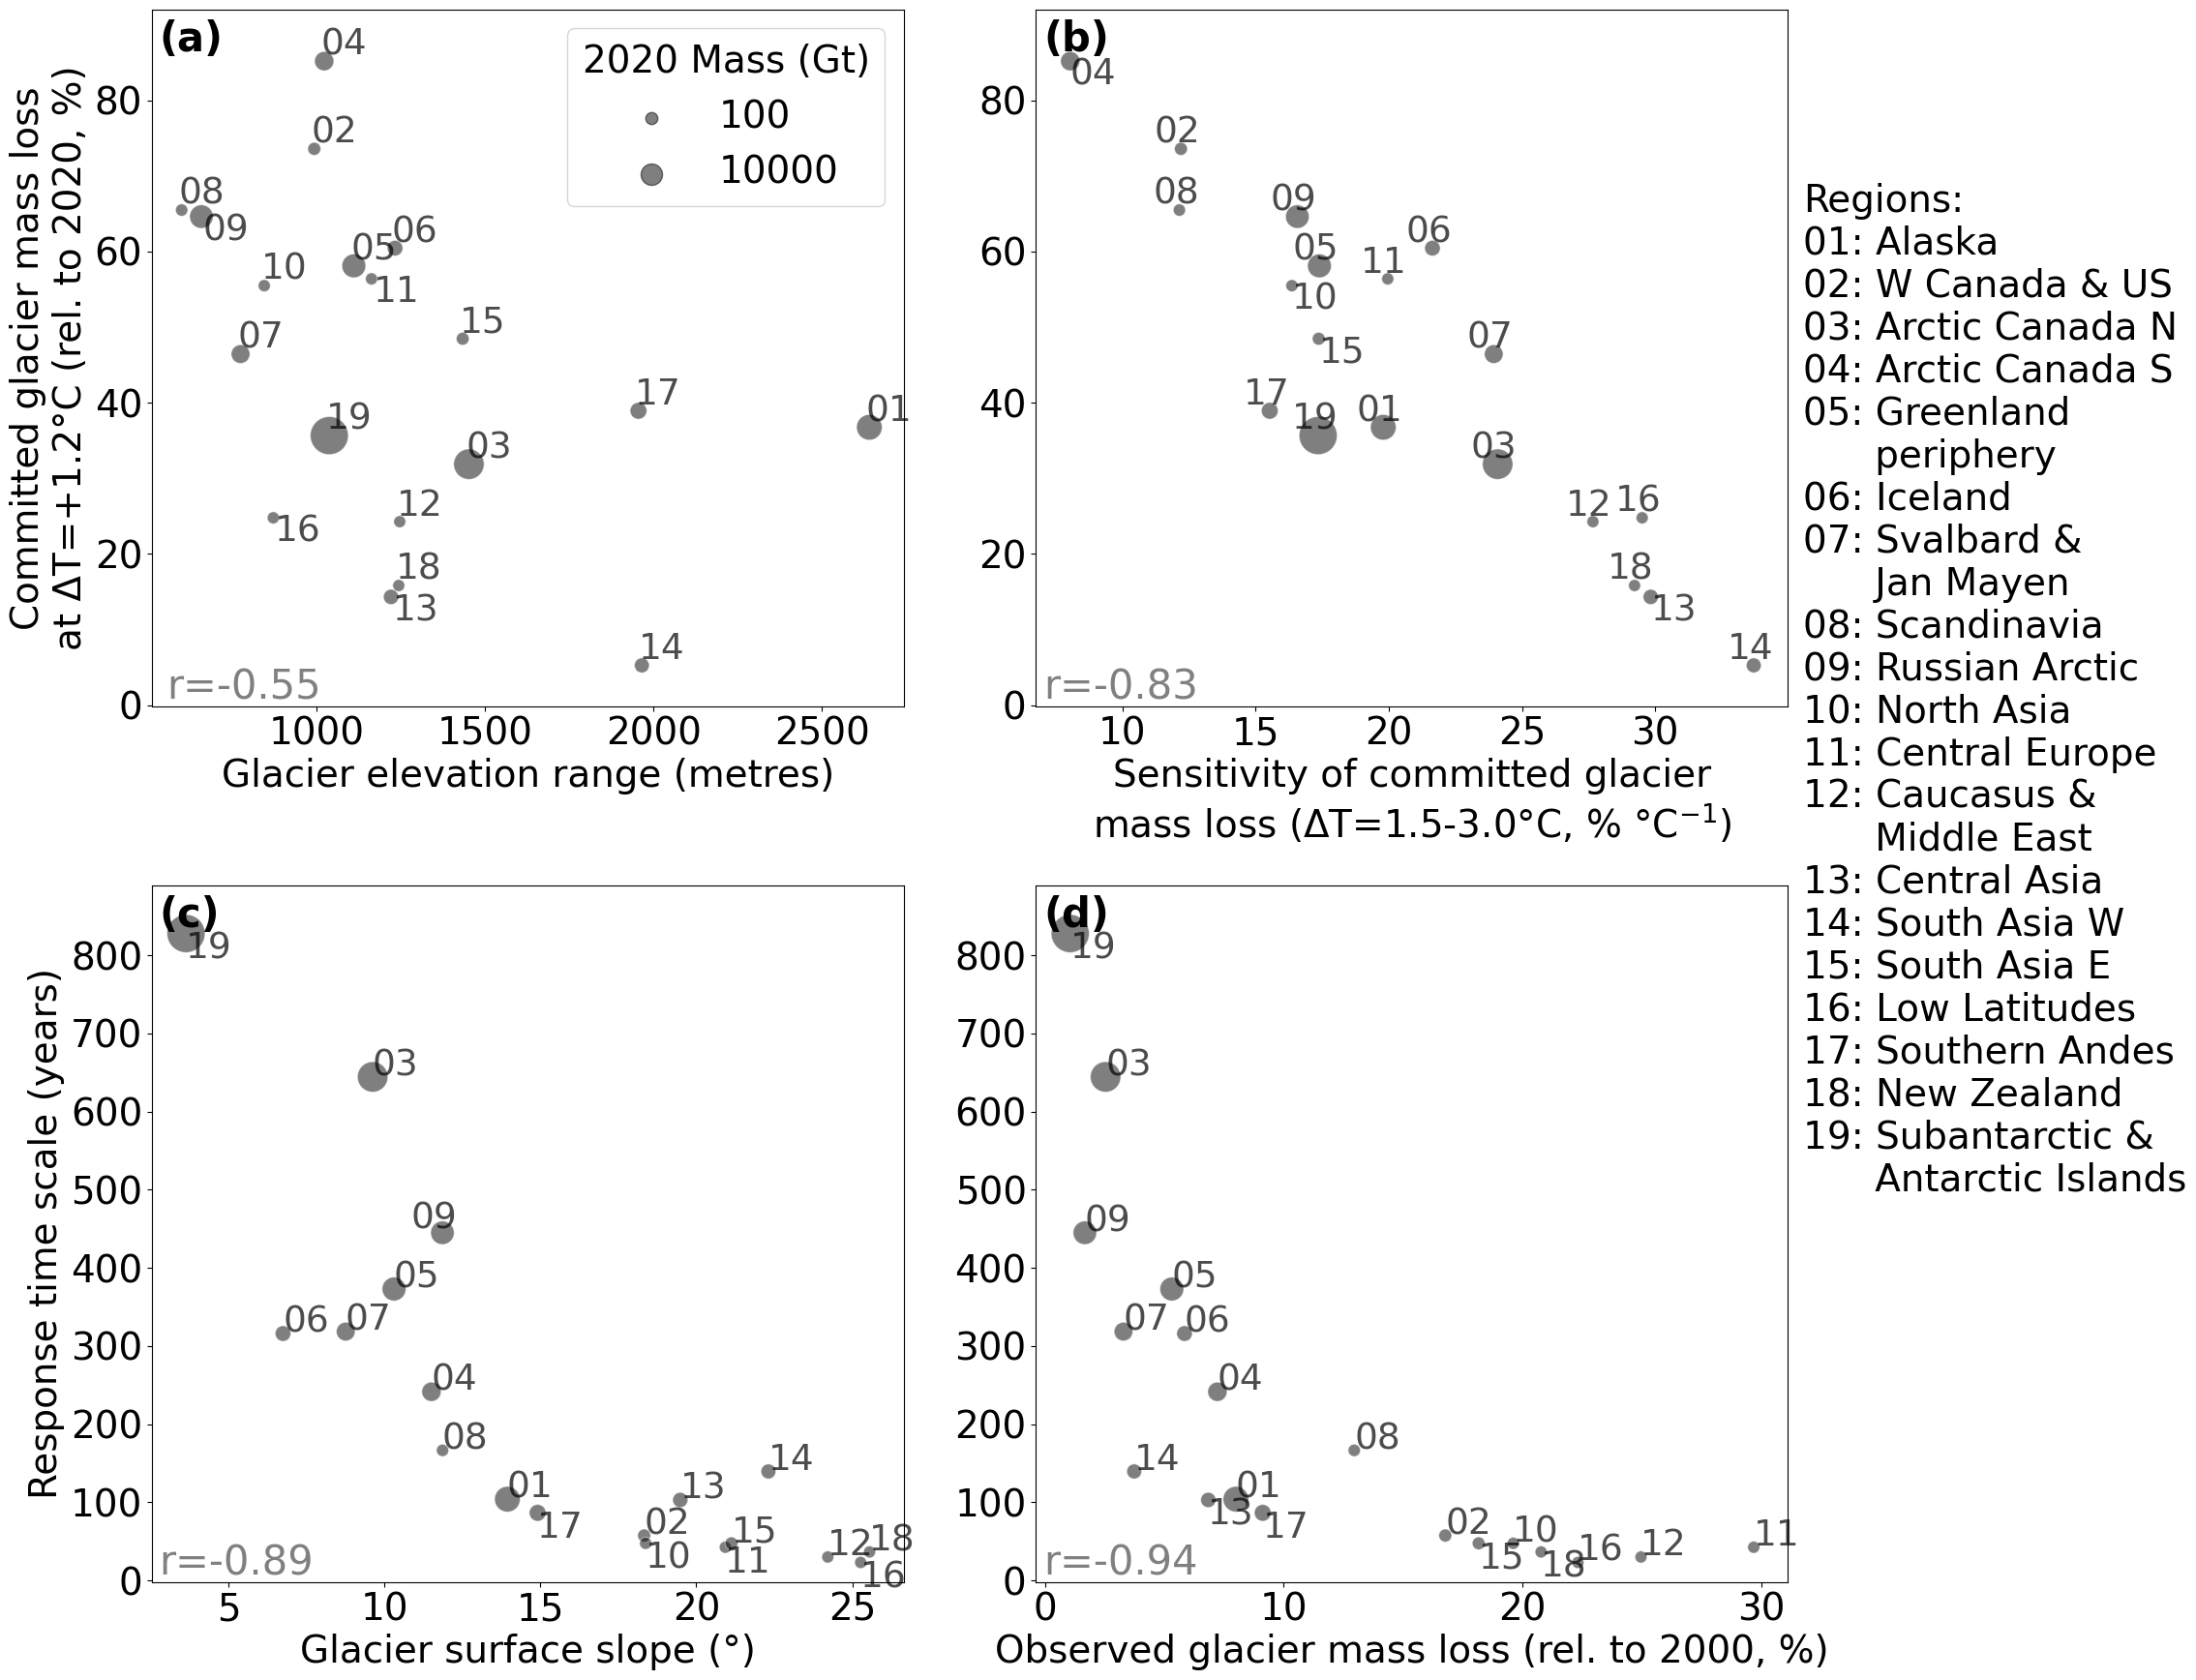

In [14]:
subpanels = False
for changing_size in [False,True]: 
    if changing_size:
        sizes = (80,800)
        alpha = 0.5
        add ='_changing_size'
    else:
        sizes = (200,200)
        alpha = 0.5#7
        add = ''

    assert (rel_add == '_rel_2020') & (k==3)

    plt.rc('font', size=28)  
    fs_t = 30
    fig,axs = plt.subplots(2,2,figsize=(23,18)) #24
    num_text_x = 0.01
    num_text_y = 0.95
    axs = axs.flatten()
    ###

    ax=axs[0]

    drop_l = ['11','16', '13', '09']
    xx = 'elev_diff_area_weighted'
    #ax.set_xlabel(f'Glacier elevation range\n(glacier-area weighted, metres)') 
    ax.set_xlabel(f'Glacier elevation range (metres)') 

    # \n(in metres, glacier-area weighted)

    yy = f'ice_loss_1.2°C_%{rel_add}'

    if changing_size:
        scatti = sns.scatterplot(data=_pd_lowess_ch,
                                y=yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                                x=xx, sizes=sizes, size='gt_2020_via_5yravg',
                                #hue=f'kmeans_cluster_{k}{rel_add}',
                                #palette=palette_cb[:k],
                                color='black',alpha =alpha,
                                 legend = False, ax = ax) #'full'
        # Get the marker size from the scatterplot
        #size_order = np.sort(scatti.collections[0].get_sizes())
        #handles, labels = ax.get_legend_handles_labels()
        #print(handles)
        #for j,h in enumerate(handles):
        #    marker_size = size_order[j]
        #    h.set_alpha(alpha)
        #    h.set_sizes([marker_size])
        #    if j in [0,10,18]:
        #        print(marker_size)
        #ax.legend([handles[0],handles[9],handles[-1]], [np.round(float(labels[0]),0).astype(int),
         #                                               np.round(float(labels[9]),0).astype(int),
         #                                          np.round(float(labels[-1]),0).astype(int)],
         #           title='2020 Mass (Gt)',
         #           #bbox_to_anchor = (1, 0.35), 
         #           ncol=1, loc='upper right')        
        
        
        size_r = sizes[1] - sizes[0]
        custom_labels = [100, 10000]
        custom_sizes = []
        for c in custom_labels:
            custom_sizes.append(sizes[0] + size_r*(c-min_s)/(max_s-min_s))


        # Create a new set of handles for the custom sizes
        custom_handles = [ax.scatter([], [], s=size, color='black', alpha = alpha) for size in custom_sizes]

        # Remove the original size legend
        #legend_labels = [label for label in labels if label not in custom_labels]
        #legend_handles = [handle for handle, label in zip(handles, labels) if label not in custom_labels]

        # Add the custom size legend
        #legend_handles.extend(custom_handles)
        #legend_labels.extend(custom_labels)

        # Update the legend with the custom sizes
        scatti.legend(custom_handles, custom_labels,
                       title='2020 Mass (Gt)', loc='upper right')
    else:
        scatti = sns.scatterplot(data=_pd_lowess_ch,
                                y=yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                                x=xx, sizes=sizes, size='gt_2020_via_5yravg',
                                #hue=f'kmeans_cluster_{k}{rel_add}',
                                #palette=palette_cb[:k],
                                color='black',alpha =alpha,
                                 legend = False, ax = ax)

    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch[[xx,yy]].dropna()[xx].values, _pd_lowess_ch[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        ax.text(0.02,0.01, f'r={corrcoef}', ha='left', # spearman's rho (write rho to clarify that), regine does not like rho, use instead "r"
                transform=ax.transAxes, color='grey', fontsize=fs_t)


    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    _pd_lowess_ch.drop(drop_l).apply(lambda x: plotlabel_0(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[drop_l].apply(lambda x: plotlabel_b0(x[xx],x[yy], x.region, ax=ax), axis=1)
    if rel_add == '_rel_farinotti':
        ax.set_ylabel('Gacier mass loss until steady-state\n(% rel. to Farinotti, ΔT=+1.2°C)') 
    else:
        #ax.set_ylabel('Glacier mass loss until steady-state\n(% rel. to 2020, ΔT=+1.2°C)')  # Steady-state glacier mass loss
        ax.set_ylabel('Committed glacier mass loss\nat ΔT=+1.2°C (rel. to 2020, %)')  # Steady-state glacier mass loss

    ax1 = ax
    ax.set_xlim([510, ax.get_xlim()[-1]])
    ### 
    ax = axs[1]

    temp0 = 1.5
    temp1 = 3.0
    xx=f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC{rel_add}'
    yy=f'ice_loss_1.2°C_%{rel_add}'
    sns.scatterplot(data=_pd_lowess_ch, x= xx,
                    color='black', alpha =alpha,  
                    sizes=sizes,size = 'gt_2020_via_5yravg',
                        y=yy, ax = ax,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                             #palette=palette_cb[:k],
                    legend = False) #False)


    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch[[xx,yy]].dropna()[yy].values)
    print(corrcoef)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        ax.text(0.01,0.01, f'r={corrcoef}', ha='left', # spearman
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    #drop_l_2 = ['01','04','02','07','16','08']
    drop_l_2 = ['13','04','10','15']

    _pd_lowess_ch.drop(drop_l_2).apply(lambda x: plotlabel_1(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[drop_l_2].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
    # ax.set_xlabel('Sensitivity of glacier mass loss until steady-state\n'+r'(ΔT=1.5-3.0°C, % °C$^{-1}$)')
    ax.set_xlabel('Sensitivity of committed glacier\nmass loss '+r'(ΔT=1.5-3.0°C, % °C$^{-1}$)')

    #(difference between {np.round(temp0,1)}°C and {np.round(temp1,1)}°C)')
    ax.set_ylabel('')
    #Steady-state glacier mass loss\n(% rel. to 2020, ΔT=1.2°C)') 

    #ax.set_ylabel('Ice loss in steady-state\n(% rel. to initial state, ΔT=+1.2°C)') 

    ax2=ax



    ##########

    num_text_x = 0.01
    num_text_y = 0.93
    r=1
    c=2
    ax=axs[2]
    yy2='resp_time_-80%_1_5_deg'
    #ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
    #ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'
    ylabel = f'Response time scale (years)'

    xx2 = f'resp_time_-50%_1_5_deg'
    #xlabel2 = r'Years when 50% of change occurs ($\Delta$T=+1.5°C)'
    xlabel2 = f'Year (50%, $\Delta$T=1.5$\pm$0.2°C)'

    xx=f'slope_weighted_area_avg' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    sns.scatterplot(data=_pd_lowess_ch,
                    y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                    x=xx,
                    color='black',alpha =alpha,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                    #palette=palette_cb[:k],
                    #s=200, 
                    sizes=sizes,size = 'gt_2020_via_5yravg',
                    legend = False, ax = ax)
    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch[[xx,yy]].dropna()[xx].values, _pd_lowess_ch[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        ax.text(0.01,0.01, f'r={corrcoef}', ha='left', #spearmanr
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    drop_l_3 = ['11','10','19','16','17', '09']

    _pd_lowess_ch.drop(drop_l_3).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)

    _pd_lowess_ch.loc[['11','10','19','16','17']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['09']].apply(lambda x: plotlabelr_l(x[xx],x[yy], x.region, ax=ax), axis=1)


    ax.set_ylabel(ylabel)

    #ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted average, °)') #\n(regional glacier-area weighted average, in °)')
    ax.set_xlabel(f'Glacier surface slope (°)') #\n(glacier-area weighted average, °)') #\n(regional glacier-area weighted average, in °)')

    if subpanels:
        inset_ax = inset_axes(ax,
                            width="43%", # width = 30% of parent_bbox
                            height="47%", # height : 1 inch
                            loc='upper right',
                            #bbox_to_anchor=(1, 0.9, 0, 0),
                               )
        #inset_ax.set_title(' t\n t', alpha =0)
        sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                                      sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
                       )
        inset_ax.set_xlabel(xlabel2+ '     ', fontsize=22) #'Year (50%)')
        inset_ax.set_ylabel(ylabel + '     ', fontsize=22) #'Year (80%)') 
        #_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
        inset_ax.text(num_text_x, num_text_y*0.94,
                 num_dict[3], weight='bold', fontsize=32, transform=inset_ax.transAxes)

        #plt.text(0.99, 0.99,
        #         'R²=0.96', fontsize=22, color='grey', va='top', ha='right',
        #         transform=inset_ax.transAxes)
        #plt.ylim([-2,840])
        #inset_ax.grid(alpha=0.5)

        inset_ax.set_aspect('equal')
        ylim0,ylim1 = inset_ax.get_ylim()
        xlim0,xlim1 = inset_ax.get_xlim()
        lim0 = min(ylim0, xlim0)
        lim1 = max(ylim1, xlim1)
        inset_ax.set_xlim([lim0, lim1])
        inset_ax.set_ylim([lim0, lim1])

        inset_ax.set_xticks(np.arange(0,lim1,300))
        inset_ax.set_yticks(np.arange(0,lim1,300))

        #inset_ax.text(0.98,0.02,
        #              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n80% vs\n50% of\nchanges", 
        #              fontsize=24,
        #     transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
        #inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)

        #############
        slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                                      _df[yy2])
        ylim = inset_ax.get_ylim()
        x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
        inset_ax.plot(x_range,slope*x_range + intercept, 
                      color = 'black', alpha = 0.5, lw=4)
        ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
        print('ratio:', ratio, 'slope:' , slope)
        inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n80% than\n50% of\nchanges",
                          xy=(150,slope*150 + intercept),
                          xytext=(450,5),
                          fontsize = 24,
                          arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                          color='grey') #, alpha1)
        inset_ax.set_ylim(ylim)
    ax3=ax

    ##############################################
    ax = axs[3]
    
    yy2='resp_time_-80%_1_5_deg'
    #ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'
    ylabel = f'Response time scale (years)'

    #s when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
    xx2 = f'resp_time_-80%_3_0_deg'

    xx=f'20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    sns.scatterplot(data=  _pd_lowess_ch,
                    y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                    x=xx,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                    color='black',alpha =alpha,
                    s=200,
                    #palette=palette_cb[:k], s=200,
                    size = 'gt_2020_via_5yravg',
                    sizes=sizes,
                    legend = False, ax=ax)


    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch[[xx,yy]].dropna()[xx].values, _pd_lowess_ch[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        ax.text(0.01,0.01, f'r={corrcoef}', ha='left', #spearmanr
                transform=ax.transAxes, color='grey', fontsize=fs_t)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    #pd_lowess_ch.drop(['05','04','11','07','16','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
    #pd_lowess_ch.loc[['05','04','11','07','16','13']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.drop(['19','17','18','15','13']).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['19','17','18','15','13']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)

    ax.set_ylabel(ylabel)

    #ax.set_xlabel(f'Observed glacier mass loss\n(2000-2019 rel. to 2000, %)') # end of 2019
    ax.set_xlabel(f'Observed glacier mass loss (rel. to 2000, %)') # end of 2019 ### 2000-2019 
    
    if subpanels:

        inset_ax = inset_axes(ax,
                            width="43%", # width = 30% of parent_bbox
                            height="47%", # height : 1 inch
                            loc='upper right',
                            #bbox_to_anchor=(1, 0.9, 0, 0),
                               )
        #inset_ax.set_title(' t\n t', alpha =0)
        sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                       sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
                       )

        inset_ax.set_xlabel(r'Year (80%, $\Delta$T=3.0$\pm$0.2°C)'+ '     ', fontsize=22)#, fontsize=20)
        inset_ax.set_ylabel(r'Year (80%, $\Delta$T=1.5$\pm$0.2°C)' + '     ', fontsize=22)#, fontsize=20) 
        inset_ax.text(num_text_x, num_text_y*0.94,
                 num_dict[5], weight='bold',fontsize=32, transform=inset_ax.transAxes)
        #_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
        #inset_ax.text(num_text_x, num_text_y*0.9,
        #         num_dict[4], fontsize=26, transform=inset_ax.transAxes)

        #plt.text(0.99, 0.99,
        #         'R²=0.96',
        #         fontsize=22, color='grey', va='top', ha='right',
        #         transform=inset_ax.transAxes)
        #plt.ylim([-2,840])
        #inset_ax.grid(alpha=0.5)

        inset_ax.set_aspect('equal')
        ylim0,ylim1 = inset_ax.get_ylim()
        xlim0,xlim1 = inset_ax.get_xlim()
        lim0 = min(ylim0, xlim0)
        lim1 = max(ylim1, xlim1)
        inset_ax.set_xlim([lim0, lim1])
        inset_ax.set_ylim([lim0, lim1])

        inset_ax.set_xticks(np.arange(0,lim1,300))
        inset_ax.set_yticks(np.arange(0,lim1,300))
        #inset_ax.text(0.98,0.02, 
        #              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n1.5°C vs\n3.0°C", fontsize=24,
        # transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
        #inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)
        slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                                      _df[yy2])
        ylim = inset_ax.get_ylim()
        x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
        inset_ax.plot(x_range,slope*x_range + intercept, 
                      color = 'black', alpha = 0.5, lw=4)
        ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
        print('ratio:', ratio, 'slope:' , slope)
        inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n1.5°C than\n3.0°C", 
                          #times\nlonger for\n80% vs\n50% of\nchanges",
                          xy=(150,slope*150 + intercept),
                          xytext=(410,5),
                          fontsize = 24,
                          arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                          color='grey') #, alpha1)
        inset_ax.set_ylim(ylim)


    ax4=ax

    ############
    num_text_x = 0.01
    for j,axi in enumerate([ax1, ax2,ax3,ax4]):
        num_text_y = 0.94
        if j==3 and subpanels:
            jj = j+1
        else:
            jj = j
        axi.text(num_text_x, num_text_y,
                 num_dict[jj], fontsize=30, weight='bold',transform=axi.transAxes)
        if j>=2:
            axi.set_ylim([-2,890])
        else:
            axi.set_ylim([-0.2,92])
        if j in [1,3]:
            axi.set_ylabel('')
            #axi.set_yticklabels([]) 
        #if j<3:
        #    axi.set_ylim(ax1.get_ylim())
    #plt.savefig(f'figures/fig4_{DATE}.png')
    #plt.savefig(f'figures/fig4_{DATE}.pdf')
    plt.tight_layout(rect=(0,0,0.84,1))


    ax.text(1.02, 0.5, 'Regions:\n'+ legend_text, transform=ax.transAxes, #weight='bold',
            fontsize=28)

    #plt.savefig(f'figures/fig4{add}_subpanel{subpanels}.png')
    #plt.savefig(f'figures/fig4{add}_subpanel{subpanels}.pdf')

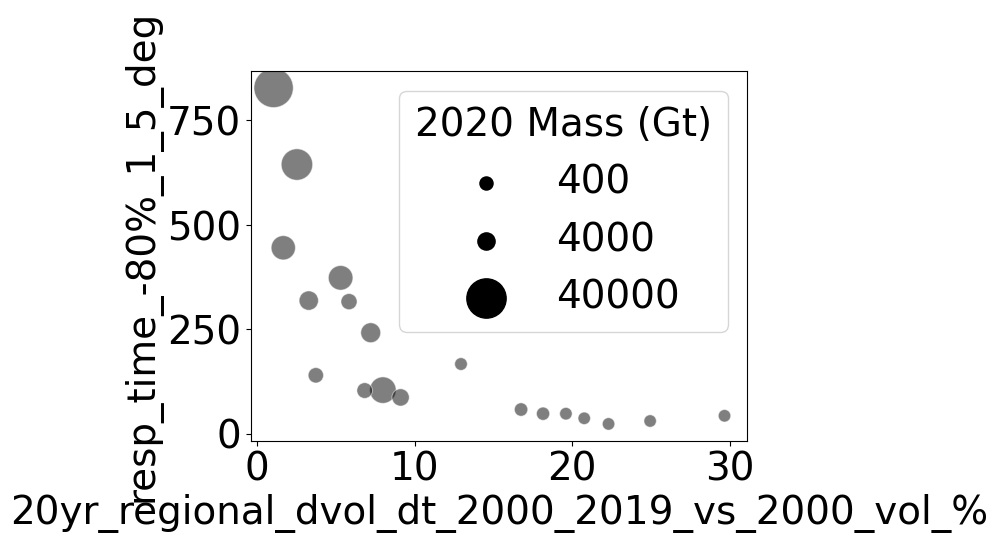

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.gca()
scatti = sns.scatterplot(data=_pd_lowess_ch,
                        y=yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                        x=xx, sizes=sizes, size='gt_2020_via_5yravg',
                        #hue=f'kmeans_cluster_{k}{rel_add}',
                        #palette=palette_cb[:k],
                        color='black',alpha =alpha,
                         legend = False, ax = ax) #'full'
# Get the marker size from the scatterplot
#size_order = np.sort(scatti.collections[0].get_sizes())
#handles, labels = ax.get_legend_handles_labels()
#print(handles)
#for j,h in enumerate(handles):
#    marker_size = size_order[j]
#    h.set_alpha(alpha)
#    h.set_sizes([marker_size])
#    if j in [0,10,18]:
#        print(marker_size)
#ax.legend([handles[0],handles[9],handles[-1]], [np.round(float(labels[0]),0).astype(int),
 #                                               np.round(float(labels[9]),0).astype(int),
 #                                          np.round(float(labels[-1]),0).astype(int)],
 #           title='2020 Mass (Gt)',
 #           #bbox_to_anchor = (1, 0.35), 
 #           ncol=1, loc='upper right')        

size_r = sizes[1] - sizes[0]
custom_labels = [400, 4000, 40000]
custom_sizes = []
for c in custom_labels:
    custom_sizes.append(sizes[0] + size_r*(c-min_s)/(max_s-min_s))


# Create a new set of handles for the custom sizes
scale_factor = scatti.collections[0].get_sizes().max() / max(custom_sizes)

custom_handles = [ax.scatter([], [], s=size*scale_factor, color='black') for size in custom_sizes]



# Update the legend with the custom sizes
scatti.legend(custom_handles, custom_labels,
               title='2020 Mass (Gt)', loc='upper right')


**SUppll. figure with older subpanels**

ratio: 2.3548387096774195 slope: 2.7052343696186014
ratio: 1.7452054794520548 slope: 1.5546863180361026


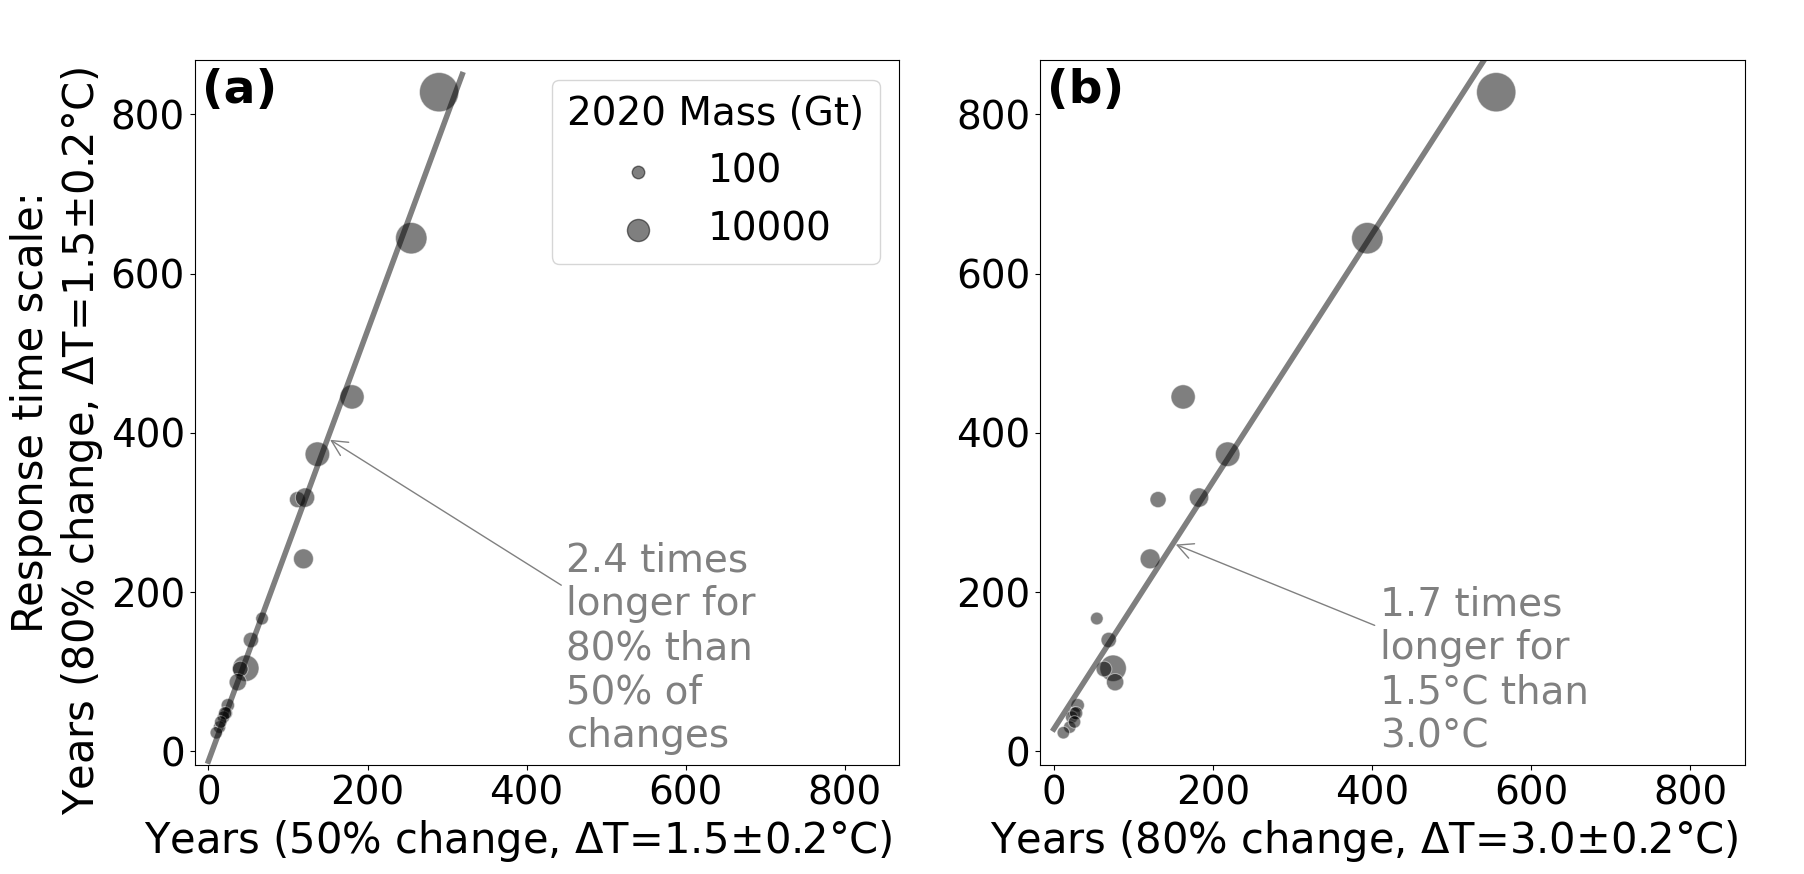

In [17]:
plt.rc('font', size=28)  
fs_label=30
sizes = (80, 800)
alpha = 0.5
num_text_y=0.94

plt.figure(figsize=(20,10))

plt.subplot(121)
inset_ax = plt.gca()
yy2 = 'resp_time_-80%_1_5_deg'
xx2 = 'resp_time_-50%_1_5_deg'

scatti = sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                              sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
               )

size_r = sizes[1] - sizes[0]
custom_labels = [100, 10000]
custom_sizes = []
for c in custom_labels:
    custom_sizes.append(sizes[0] + size_r*(c-min_s)/(max_s-min_s))


# Create a new set of handles for the custom sizes
custom_handles = [ax.scatter([], [], s=size, color='black', alpha = alpha) for size in custom_sizes]


# Update the legend with the custom sizes
scatti.legend(custom_handles, custom_labels,
               title='2020 Mass (Gt)', loc='upper right')


inset_ax.set_xlabel(r'Years (50% change, $\Delta$T=1.5$\pm$0.2°C)'+ '     ', fontsize=fs_label) #'Year (50%)')
inset_ax.set_ylabel(f'Response time scale:\n' + r'Years (80% change, $\Delta$T=1.5$\pm$0.2°C)' + '     ', fontsize=fs_label)#, fontsize=20) 

#inset_ax.set_ylabel(r'Years (80%, $\Delta$T=1.5$\pm$0.2°C)' + '     ', fontsize=fs_label) #'Year (80%)') 
#_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
inset_ax.text(num_text_x, num_text_y,
         num_dict[0], weight='bold', fontsize=34, transform=inset_ax.transAxes)

#plt.text(0.99, 0.99,
#         'R²=0.96', fontsize=22, color='grey', va='top', ha='right',
#         transform=inset_ax.transAxes)
#plt.ylim([-2,840])
#inset_ax.grid(alpha=0.5)

inset_ax.set_aspect('equal')
ylim0,ylim1 = inset_ax.get_ylim()
xlim0,xlim1 = inset_ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)
inset_ax.set_xlim([lim0, lim1])
inset_ax.set_ylim([lim0, lim1])

inset_ax.set_xticks(np.arange(0,lim1,200))
inset_ax.set_yticks(np.arange(0,lim1,200))

#inset_ax.text(0.98,0.02,
#              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n80% vs\n50% of\nchanges", 
#              fontsize=24,
#     transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
#inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)

#############
slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                              _df[yy2])
ylim = inset_ax.get_ylim()
x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
inset_ax.plot(x_range,slope*x_range + intercept, 
              color = 'black', alpha = 0.5, lw=4)
ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
print('ratio:', ratio, 'slope:' , slope)
inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n80% than\n50% of\nchanges",
                  xy=(150,slope*150 + intercept),
                  xytext=(450,5),
                  fontsize = 28,
                  arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                  color='grey') #, alpha1)
inset_ax.set_ylim(ylim)

plt.subplot(122)

yy2='resp_time_-80%_1_5_deg'
xx2 = f'resp_time_-80%_3_0_deg'
inset_ax = plt.gca()
#inset_ax.set_title(' t\n t', alpha =0)
sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
               sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
               )

inset_ax.set_xlabel(r'Years (80% change, $\Delta$T=3.0$\pm$0.2°C)'+ '     ', fontsize=fs_label)#, fontsize=20)
inset_ax.set_ylabel('')
inset_ax.text(num_text_x, num_text_y,
         num_dict[1], weight='bold',fontsize=34, transform=inset_ax.transAxes)
#_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
#inset_ax.text(num_text_x, num_text_y*0.9,
#         num_dict[4], fontsize=26, transform=inset_ax.transAxes)

#plt.text(0.99, 0.99,
#         'R²=0.96',
#         fontsize=22, color='grey', va='top', ha='right',
#         transform=inset_ax.transAxes)
#plt.ylim([-2,840])
#inset_ax.grid(alpha=0.5)

inset_ax.set_aspect('equal')
ylim0,ylim1 = inset_ax.get_ylim()
xlim0,xlim1 = inset_ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)
inset_ax.set_xlim([lim0, lim1])
inset_ax.set_ylim([lim0, lim1])

inset_ax.set_xticks(np.arange(0,lim1,200))
inset_ax.set_yticks(np.arange(0,lim1,200))
#inset_ax.text(0.98,0.02, 
#              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n1.5°C vs\n3.0°C", fontsize=24,
# transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
#inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)
slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                              _df[yy2])
ylim = inset_ax.get_ylim()
x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
inset_ax.plot(x_range,slope*x_range + intercept, 
              color = 'black', alpha = 0.5, lw=4)
ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
print('ratio:', ratio, 'slope:' , slope)
inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n1.5°C than\n3.0°C", 
                  #times\nlonger for\n80% vs\n50% of\nchanges",
                  xy=(150,slope*150 + intercept),
                  xytext=(410,5),
                  fontsize = 28,
                  arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                  color='grey') #, alpha1)
inset_ax.set_ylim(ylim)
plt.savefig('figures/suppl_fig_response_time_scale_variants.png')

**OLD???**

-0.8298245614035088
ratio: 2.3548387096774195 slope: 2.7052343696186014
ratio: 1.7452054794520548 slope: 1.5546863180361026


/tmp/ipykernel_1541056/800739218.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=(0,0,0.85,1))


[<matplotlib.collections.PathCollection object at 0x7f80f56650c0>, <matplotlib.collections.PathCollection object at 0x7f80f5643f40>, <matplotlib.collections.PathCollection object at 0x7f80f5643280>, <matplotlib.collections.PathCollection object at 0x7f80f5664d00>, <matplotlib.collections.PathCollection object at 0x7f80f5664280>, <matplotlib.collections.PathCollection object at 0x7f80f56659f0>, <matplotlib.collections.PathCollection object at 0x7f80f5665ed0>, <matplotlib.collections.PathCollection object at 0x7f80f56663b0>, <matplotlib.collections.PathCollection object at 0x7f80f5666890>, <matplotlib.collections.PathCollection object at 0x7f80f5643220>, <matplotlib.collections.PathCollection object at 0x7f80f5666ef0>, <matplotlib.collections.PathCollection object at 0x7f80f56673d0>, <matplotlib.collections.PathCollection object at 0x7f80f56678b0>, <matplotlib.collections.PathCollection object at 0x7f80f5667d90>, <matplotlib.collections.PathCollection object at 0x7f80f56902b0>, <matplotl

/tmp/ipykernel_1541056/800739218.py:347: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=(0,0,0.85,1))


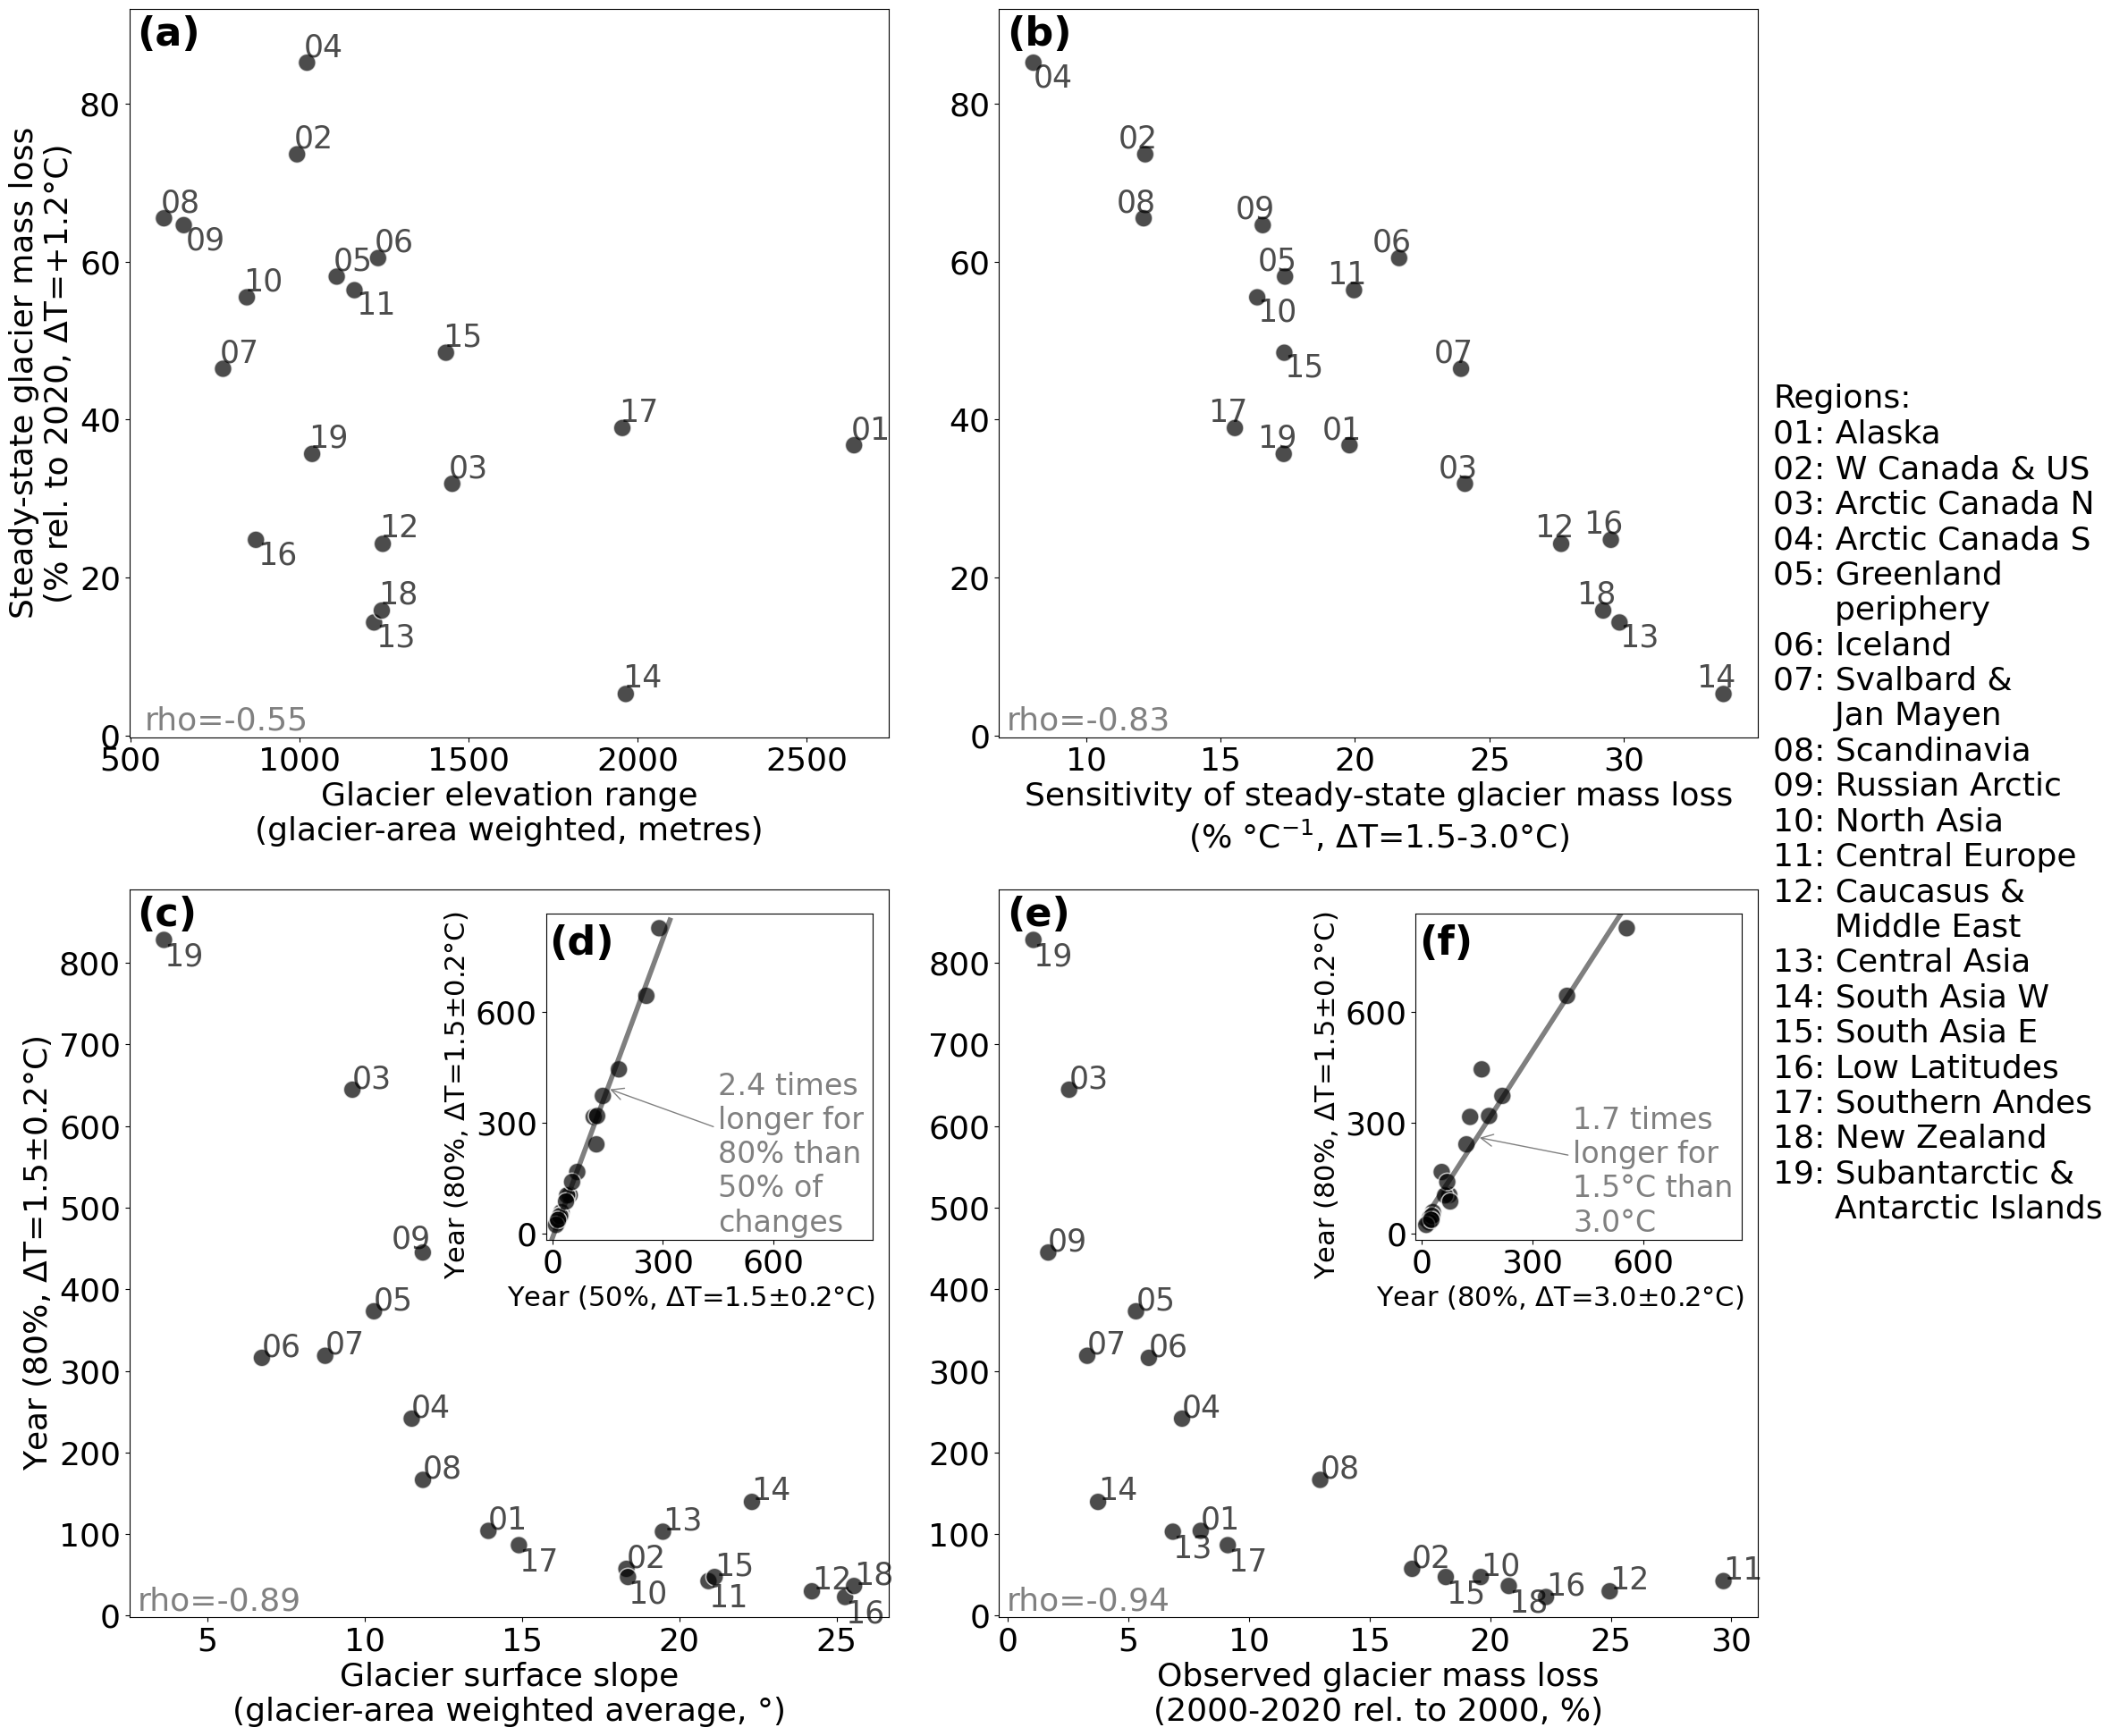

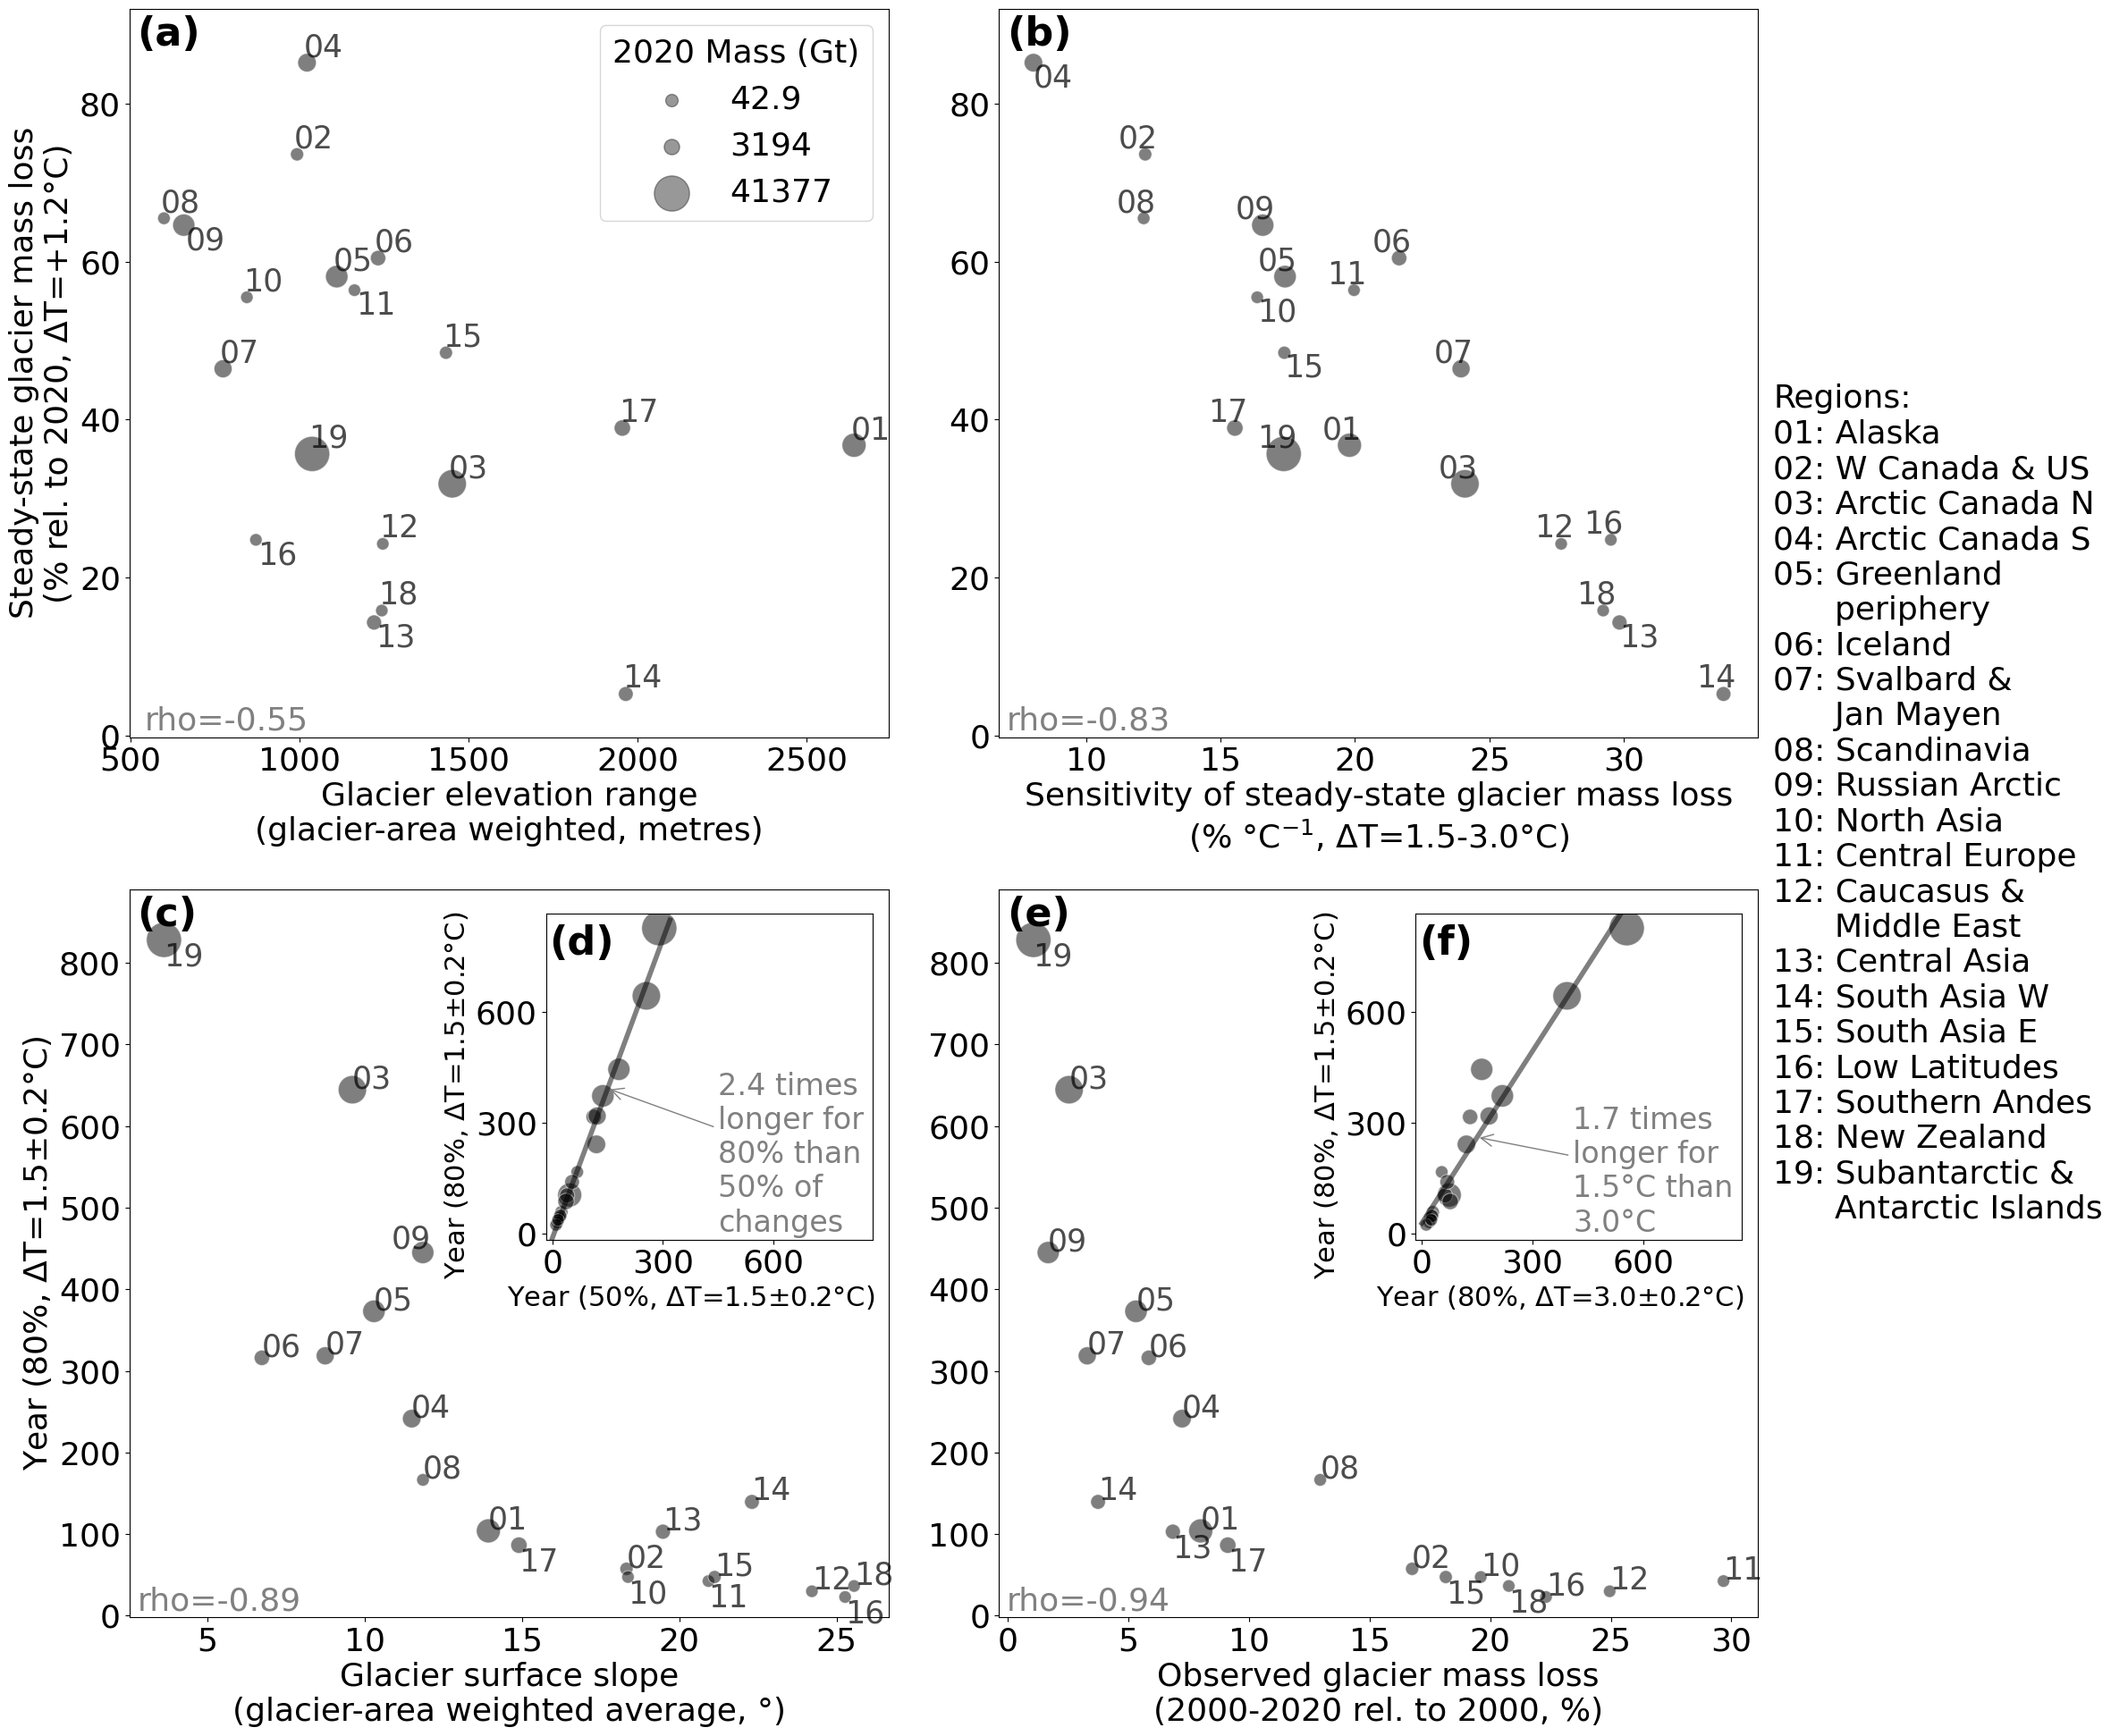

In [10]:
for changing_size in [False,True]: 
    if changing_size:
        sizes = (100,800)
        alpha = 0.5
        add ='_changing_size'
    else:
        sizes = (200,200)
        alpha = 0.7
        add = ''

    assert (rel_add == '_rel_2020') & (k==3)

    plt.rc('font', size=26)  

    fig,axs = plt.subplots(2,2,figsize=(24,20))
    num_text_x = 0.01
    num_text_y = 0.95
    axs = axs.flatten()
    ###

    ax=axs[0]

    drop_l = ['11','16', '13', '09']
    xx = 'elev_diff_area_weighted'
    ax.set_xlabel(f'Glacier elevation range\n(glacier-area weighted, metres)') 
    # \n(in metres, glacier-area weighted)

    yy = f'ice_loss_1.2°C_%{rel_add}'

    if changing_size:
        scatti = sns.scatterplot(data=_pd_lowess_ch,
                                y=yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                                x=xx, sizes=sizes, size='gt_2020_via_5yravg',
                                #hue=f'kmeans_cluster_{k}{rel_add}',
                                #palette=palette_cb[:k],
                                color='black',alpha =alpha,
                                 legend = 'full', ax = ax)
        # Get the marker size from the scatterplot
        size_order = np.sort(scatti.collections[0].get_sizes())
        handles, labels = ax.get_legend_handles_labels()
        print(handles)
        for j,h in enumerate(handles):
            marker_size = size_order[j]
            h.set_alpha(alpha)
            h.set_sizes([marker_size])
            if j in [0,10,18]:
                print(marker_size)
        ax.legend([handles[0],handles[10],handles[-1]], [np.round(float(labels[0]),1),
                                                        np.round(float(labels[10]),0).astype(int),
                                                   np.round(float(labels[-1]),0).astype(int)],
                    title='2020 Mass (Gt)',
                    #bbox_to_anchor = (1, 0.35), 
                    ncol=1, loc='upper right')
        # ax.legend(*scatti.legend_elements("sizes", num=6))
    else:
        scatti = sns.scatterplot(data=_pd_lowess_ch,
                                y=yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                                x=xx, sizes=sizes, size='gt_2020_via_5yravg',
                                #hue=f'kmeans_cluster_{k}{rel_add}',
                                #palette=palette_cb[:k],
                                color='black',alpha =alpha,
                                 legend = False, ax = ax)

    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch[[xx,yy]].dropna()[xx].values, _pd_lowess_ch[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        ax.text(0.02,0.01, f'rho={corrcoef}', ha='left', # spearman's rho (write rho to clarify that)
                transform=ax.transAxes, color='grey', fontsize=26)


    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    _pd_lowess_ch.drop(drop_l).apply(lambda x: plotlabel_0(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[drop_l].apply(lambda x: plotlabel_b0(x[xx],x[yy], x.region, ax=ax), axis=1)
    if rel_add == '_rel_farinotti':
        ax.set_ylabel('Steady-state glacier mass loss\n(% rel. to Farinotti, ΔT=+1.2°C)') 
    else:
        ax.set_ylabel('Steady-state glacier mass loss\n(% rel. to 2020, ΔT=+1.2°C)')

    ax1 = ax

    ### 
    ax = axs[1]

    temp0 = 1.5
    temp1 = 3.0
    xx=f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC{rel_add}'
    yy=f'ice_loss_1.2°C_%{rel_add}'
    sns.scatterplot(data=_pd_lowess_ch, x= xx,
                    color='black', alpha =alpha,               
                    sizes=sizes,size = 'gt_2020_via_5yravg',
                        y=yy, ax = ax,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                             #palette=palette_cb[:k],
                    legend = False) #False)


    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch[[xx,yy]].dropna()[xx].values,
                              _pd_lowess_ch[[xx,yy]].dropna()[yy].values)
    print(corrcoef)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        ax.text(0.01,0.01, f'rho={corrcoef}', ha='left', # spearman
                transform=ax.transAxes, color='grey', fontsize=26)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    #drop_l_2 = ['01','04','02','07','16','08']
    drop_l_2 = ['13','04','10','15']

    _pd_lowess_ch.drop(drop_l_2).apply(lambda x: plotlabel_1(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[drop_l_2].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
    ax.set_xlabel('Sensitivity of steady-state glacier mass loss\n'+r'(% °C$^{-1}$, ΔT=1.5-3.0°C)')
    #(difference between {np.round(temp0,1)}°C and {np.round(temp1,1)}°C)')
    ax.set_ylabel('')
    #Steady-state glacier mass loss\n(% rel. to 2020, ΔT=1.2°C)') 

    #ax.set_ylabel('Ice loss in steady-state\n(% rel. to initial state, ΔT=+1.2°C)') 

    ax2=ax



    ##########

    num_text_x = 0.01
    num_text_y = 0.93
    r=1
    c=2
    ax=axs[2]
    yy2='resp_time_-80%_1_5_deg'
    #ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
    ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'

    xx2 = f'resp_time_-50%_1_5_deg'
    #xlabel2 = r'Years when 50% of change occurs ($\Delta$T=+1.5°C)'
    xlabel2 = f'Year (50%, $\Delta$T=1.5$\pm$0.2°C)'

    xx=f'slope_weighted_area_avg' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    sns.scatterplot(data=_pd_lowess_ch,
                    y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                    x=xx,
                    color='black',alpha =alpha,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                    #palette=palette_cb[:k],
                    #s=200, 
                    sizes=sizes,size = 'gt_2020_via_5yravg',
                    legend = False, ax = ax)
    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch[[xx,yy]].dropna()[xx].values, _pd_lowess_ch[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        ax.text(0.01,0.01, f'rho={corrcoef}', ha='left', #spearmanr
                transform=ax.transAxes, color='grey', fontsize=26)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    drop_l_3 = ['11','10','19','16','17', '09']

    _pd_lowess_ch.drop(drop_l_3).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)

    _pd_lowess_ch.loc[['11','10','19','16','17']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['09']].apply(lambda x: plotlabelr_l(x[xx],x[yy], x.region, ax=ax), axis=1)


    ax.set_ylabel(ylabel)

    ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted average, °)') #\n(regional glacier-area weighted average, in °)')

    inset_ax = inset_axes(ax,
                        width="43%", # width = 30% of parent_bbox
                        height="47%", # height : 1 inch
                        loc='upper right',
                        #bbox_to_anchor=(1, 0.9, 0, 0),
                           )
    #inset_ax.set_title(' t\n t', alpha =0)
    sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                                  sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
                   )
    inset_ax.set_xlabel(xlabel2+ '     ', fontsize=22) #'Year (50%)')
    inset_ax.set_ylabel(ylabel + '     ', fontsize=22) #'Year (80%)') 
    #_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
    inset_ax.text(num_text_x, num_text_y*0.94,
             num_dict[3], weight='bold', fontsize=32, transform=inset_ax.transAxes)

    #plt.text(0.99, 0.99,
    #         'R²=0.96', fontsize=22, color='grey', va='top', ha='right',
    #         transform=inset_ax.transAxes)
    #plt.ylim([-2,840])
    #inset_ax.grid(alpha=0.5)

    inset_ax.set_aspect('equal')
    ylim0,ylim1 = inset_ax.get_ylim()
    xlim0,xlim1 = inset_ax.get_xlim()
    lim0 = min(ylim0, xlim0)
    lim1 = max(ylim1, xlim1)
    inset_ax.set_xlim([lim0, lim1])
    inset_ax.set_ylim([lim0, lim1])

    inset_ax.set_xticks(np.arange(0,lim1,300))
    inset_ax.set_yticks(np.arange(0,lim1,300))

    #inset_ax.text(0.98,0.02,
    #              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n80% vs\n50% of\nchanges", 
    #              fontsize=24,
    #     transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
    #inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)

    #############
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                                  _df[yy2])
    ylim = inset_ax.get_ylim()
    x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
    inset_ax.plot(x_range,slope*x_range + intercept, 
                  color = 'black', alpha = 0.5, lw=4)
    ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
    print('ratio:', ratio, 'slope:' , slope)
    inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n80% than\n50% of\nchanges",
                      xy=(150,slope*150 + intercept),
                      xytext=(450,5),
                      fontsize = 24,
                      arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                      color='grey') #, alpha1)
    inset_ax.set_ylim(ylim)
    ax3=ax

    ##############################################
    ax = axs[3]

    yy2='resp_time_-80%_1_5_deg'
    ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'
    #s when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
    xx2 = f'resp_time_-80%_3_0_deg'

    xx=f'20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    sns.scatterplot(data=  _pd_lowess_ch,
                    y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                    x=xx,
                    #hue=f'kmeans_cluster_{k}{rel_add}',
                    color='black',alpha =alpha,
                    s=200,
                    #palette=palette_cb[:k], s=200,
                    size = 'gt_2020_via_5yravg',
                    sizes=sizes,
                    legend = False, ax=ax)


    print_spearman = True
    corrcoef,pval = spearmanr(_pd_lowess_ch[[xx,yy]].dropna()[xx].values, _pd_lowess_ch[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        ax.text(0.01,0.01, f'rho={corrcoef}', ha='left', #spearmanr
                transform=ax.transAxes, color='grey', fontsize=26)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    #pd_lowess_ch.drop(['05','04','11','07','16','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
    #pd_lowess_ch.loc[['05','04','11','07','16','13']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.drop(['19','17','18','15','13']).apply(lambda x: plotlabelr(x[xx],x[yy], x.region, ax=ax), axis=1)
    _pd_lowess_ch.loc[['19','17','18','15','13']].apply(lambda x: plotlabel_bbr(x[xx],x[yy], x.region, ax=ax), axis=1)

    ax.set_ylabel(ylabel)

    ax.set_xlabel(f'Observed glacier mass loss\n(2000-2020 rel. to 2000, %)')

    inset_ax = inset_axes(ax,
                        width="43%", # width = 30% of parent_bbox
                        height="47%", # height : 1 inch
                        loc='upper right',
                        #bbox_to_anchor=(1, 0.9, 0, 0),
                           )
    #inset_ax.set_title(' t\n t', alpha =0)
    sns.scatterplot(_df,y=yy2,x=xx2,ax=inset_ax, color='black',alpha =alpha,
                   sizes=sizes,size = 'gt_2020_via_5yravg', legend=False
                   )




    inset_ax.set_xlabel(r'Year (80%, $\Delta$T=3.0$\pm$0.2°C)'+ '     ', fontsize=22)#, fontsize=20)
    inset_ax.set_ylabel(r'Year (80%, $\Delta$T=1.5$\pm$0.2°C)' + '     ', fontsize=22)#, fontsize=20) 
    inset_ax.text(num_text_x, num_text_y*0.94,
             num_dict[5], weight='bold',fontsize=32, transform=inset_ax.transAxes)
    #_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
    #inset_ax.text(num_text_x, num_text_y*0.9,
    #         num_dict[4], fontsize=26, transform=inset_ax.transAxes)

    #plt.text(0.99, 0.99,
    #         'R²=0.96',
    #         fontsize=22, color='grey', va='top', ha='right',
    #         transform=inset_ax.transAxes)
    #plt.ylim([-2,840])
    #inset_ax.grid(alpha=0.5)

    inset_ax.set_aspect('equal')
    ylim0,ylim1 = inset_ax.get_ylim()
    xlim0,xlim1 = inset_ax.get_xlim()
    lim0 = min(ylim0, xlim0)
    lim1 = max(ylim1, xlim1)
    inset_ax.set_xlim([lim0, lim1])
    inset_ax.set_ylim([lim0, lim1])

    inset_ax.set_xticks(np.arange(0,lim1,300))
    inset_ax.set_yticks(np.arange(0,lim1,300))
    #inset_ax.text(0.98,0.02, 
    #              f"{np.nanmedian(_df[yy2]/_df[xx2]).round(1)} times\nlonger for\n1.5°C vs\n3.0°C", fontsize=24,
    # transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
    #inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(_df[xx2].values,
                                                                  _df[yy2])
    ylim = inset_ax.get_ylim()
    x_range = np.arange(0,_df[xx2].values.max()*1.1, 0.01)
    inset_ax.plot(x_range,slope*x_range + intercept, 
                  color = 'black', alpha = 0.5, lw=4)
    ratio = np.nanmedian(_df[yy2].values/_df[xx2].values)
    print('ratio:', ratio, 'slope:' , slope)
    inset_ax.annotate(f"{ratio.round(1)} times\nlonger for\n1.5°C than\n3.0°C", 
                      #times\nlonger for\n80% vs\n50% of\nchanges",
                      xy=(150,slope*150 + intercept),
                      xytext=(410,5),
                      fontsize = 24,
                      arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='grey'),
                      color='grey') #, alpha1)
    inset_ax.set_ylim(ylim)


    ax4=ax

    ############
    num_text_x = 0.01
    for j,axi in enumerate([ax1, ax2,ax3,ax4]):
        num_text_y = 0.95
        if j==3:
            jj = j+1
        else:
            jj = j
        axi.text(num_text_x, num_text_y,
                 num_dict[jj], fontsize=32, weight='bold',transform=axi.transAxes)
        if j>=2:
            axi.set_ylim([-2,890])
        else:
            axi.set_ylim([-0.2,92])
        if j in [1,3]:
            axi.set_ylabel('')
            #axi.set_yticklabels([]) 
        #if j<3:
        #    axi.set_ylim(ax1.get_ylim())
    #plt.savefig(f'figures/fig4_{DATE}.png')
    #plt.savefig(f'figures/fig4_{DATE}.pdf')
    plt.tight_layout(rect=(0,0,0.85,1))


    ax.text(1.02, 0.5, 'Regions:\n'+ legend_text, transform=ax.transAxes, #weight='bold',
            fontsize=26)

    plt.savefig(f'figures/fig4{add}.png')
    plt.savefig(f'figures/fig4{add}.pdf')

***OLD**

In [ ]:
plt.rc('font', size=24)  
plt.figure(figsize=(20,9.5))

num_text_x = 0.01
num_text_y = 0.93
r=1
c=2
ax=plt.subplot(r,c,1)
ax=plt.gca()
yy2='resp_time_-80%_1_5_deg'
#ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'

xx2 = f'resp_time_-50%_1_5_deg'
#xlabel2 = r'Years when 50% of change occurs ($\Delta$T=+1.5°C)'
xlabel2 = f'Year (50%, $\Delta$T=1.5$\pm$0.2°C)'

xx=f'slope_weighted_area_avg' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
yy = 'resp_time_-80%_1_5_deg'
sns.scatterplot(data=_pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                hue=f'kmeans_cluster_{k}{rel_add}',
                palette=palette_cb[:k], #s=200,
                size = 'gt_2020_via_5yravg',
                sizes=sizes,
                legend = False)
print_spearman = True
corrcoef,pval = spearmanr(_pd_lowess_ch[[xx,yy]].dropna()[xx].values,
                          _pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.01,0.01, f'r={corrcoef}', ha='left', #spearmanr
            transform=ax.transAxes, color='grey', fontsize=26)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
_pd_lowess_ch.drop(['11','10','19','16','17']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
_pd_lowess_ch.loc[['11','10','19','16','17']].apply(lambda x: plotlabel_bb(x[xx],x[yy], x.region, ax=ax), axis=1)

ax.set_ylabel(ylabel)

ax.set_xlabel(f'Glacier surface slope (°)') #\n(regional glacier-area weighted average, in °)')

inset_ax = inset_axes(ax,
                    width="43%", # width = 30% of parent_bbox
                    height="47%", # height : 1 inch
                    loc='upper right',
                    #bbox_to_anchor=(1, 0.9, 0, 0),
                     )
#inset_ax.set_title(' t\n t', alpha =0)
sns.scatterplot(df.loc[df.region !='Globally'],y=yy2,x=xx2,ax=inset_ax, color='black',
                sizes=sizes,size = 'gt_2020_via_5yravg',legend='full')
inset_ax.set_xlabel(xlabel2+ '     ',fontsize=22) #'Year (50%)')
inset_ax.set_ylabel(ylabel + '     ',fontsize=22) #'Year (80%)') 
#_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
inset_ax.text(num_text_x, num_text_y*0.94,
         num_dict[1], weight='bold', fontsize=32, transform=inset_ax.transAxes)

#plt.text(0.99, 0.99,
#         'R²=0.96', fontsize=22, color='grey', va='top', ha='right',
#         transform=inset_ax.transAxes)
#plt.ylim([-2,840])
#inset_ax.grid(alpha=0.5)
handles, labels = inset_ax.get_legend_handles_labels()
inset_ax.legend([handles[0],handles[-1]], [np.round(float(labels[0]),1),
                                           np.round(float(labels[-1]),0).astype(int)],
                title='2020 Mass (Gt)',
                bbox_to_anchor = (1, -0.2), ncol=2, loc='upper right')

inset_ax.set_aspect('equal')
ylim0,ylim1 = inset_ax.get_ylim()
xlim0,xlim1 = inset_ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)
inset_ax.set_xlim([lim0, lim1])
inset_ax.set_ylim([lim0, lim1])

inset_ax.set_xticks(np.arange(0,lim1,300))
inset_ax.set_yticks(np.arange(0,lim1,300))

inset_ax.text(0.98,0.02,
              f"{np.nanmedian(df.loc[df.region !='Globally'][yy2]/df.loc[df.region !='Globally'][xx2]).round(1)} times\nlonger for\n80% than\n50% of\nchanges", 
              fontsize=24,
     transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)
ax1=ax

##############################################
ax=plt.subplot(r,c,2)

yy2='resp_time_-80%_1_5_deg'
ylabel = f'Year (80%, $\Delta$T=1.5$\pm$0.2°C)'
#s when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
xx2 = f'resp_time_-80%_3_0_deg'

xx=f'20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
yy = 'resp_time_-80%_1_5_deg'
sns.scatterplot(data=_pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                hue=f'kmeans_cluster_{k}{rel_add}',
                palette=palette_cb[:k], #s=200
                size = 'gt_2020_via_5yravg',
                sizes=sizes,
                legend = False)
print_spearman = True
corrcoef,pval = spearmanr(_pd_lowess_ch[[xx,yy]].dropna()[xx].values,
                          _pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.01,0.01, f'r={corrcoef}', ha='left', #spearmanr
            transform=ax.transAxes, color='grey', fontsize=26)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
#pd_lowess_ch.drop(['05','04','11','07','16','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
#pd_lowess_ch.loc[['05','04','11','07','16','13']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
_pd_lowess_ch.drop(['19','17','18','15','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
_pd_lowess_ch.loc[['19','17','18','15','13']].apply(lambda x: plotlabel_bb(x[xx],x[yy], x.region, ax=ax), axis=1)

ax.set_ylabel(ylabel)

ax.set_xlabel(f'Observed glacier mass loss (2000-2020 rel. to 2000, %)')

inset_ax = inset_axes(ax,
                    width="43%", # width = 30% of parent_bbox
                    height="47%", # height : 1 inch
                    loc='upper right'
                    #bbox_to_anchor=(1, 0.9, 0, 0),
                       )
#inset_ax.set_title(' t\n t', alpha =0)
sns.scatterplot(df.loc[df.region !='Globally'],y=yy2,x=xx2,ax=inset_ax, color='black',
                size = 'gt_2020_via_5yravg',
                sizes=sizes)
inset_ax.set_xlabel(r'Year (80%, $\Delta$T=3.0$\pm$0.2°C)'+ '     ',fontsize=22)#, fontsize=20)
inset_ax.set_ylabel(r'Year (80%, $\Delta$T=1.5$\pm$0.2°C)' + '     ',fontsize=22)#, fontsize=20) 
inset_ax.text(num_text_x, num_text_y*0.94,
         num_dict[3], weight='bold',fontsize=32, transform=inset_ax.transAxes)
#_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
#inset_ax.text(num_text_x, num_text_y*0.9,
#         num_dict[4], fontsize=26, transform=inset_ax.transAxes)

#plt.text(0.99, 0.99,
#         'R²=0.96',
#         fontsize=22, color='grey', va='top', ha='right',
#         transform=inset_ax.transAxes)
#plt.ylim([-2,840])
#inset_ax.grid(alpha=0.5)

inset_ax.set_aspect('equal')
ylim0,ylim1 = inset_ax.get_ylim()
xlim0,xlim1 = inset_ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)
inset_ax.set_xlim([lim0, lim1])
inset_ax.set_ylim([lim0, lim1])

inset_ax.set_xticks(np.arange(0,lim1,300))
inset_ax.set_yticks(np.arange(0,lim1,300))
inset_ax.text(0.98,0.02, 
              f"{np.nanmedian(df.loc[df.region !='Globally'][yy2]/df.loc[df.region !='Globally'][xx2]).round(1)} times\nlonger for\n1.5°C than\n3.0°C", fontsize=24,
 transform=inset_ax.transAxes, ha='right', va='bottom', color='grey')
inset_ax.plot([0, 1], [0, 1], color='lightgrey',ls='--',lw=2, transform=inset_ax.transAxes)
inset_ax.get_legend().remove()

ax2=ax
num_text_x = 0.01
for j,axi in enumerate([ax1, ax2]):
    num_text_y = 0.95
    axi.text(num_text_x, num_text_y,
             num_dict[j*2], fontsize=32, weight='bold',transform=axi.transAxes)
    axi.set_ylim([-2,890])
    if j == 1:
        axi.set_ylabel('')
        #axi.set_yticklabels([]) 
    #if j<3:
    #    axi.set_ylim(ax1.get_ylim())
plt.tight_layout()
plt.savefig(f'figures/fig4_{DATE}_scaled_2020_glacier_mass.png')
plt.savefig(f'figures/fig4_{DATE}_scaled_2020_glacier_mass.pdf')

/tmp/ipykernel_2702002/3077210001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hugo_far_reg.loc[pd_hugo_far_reg.index,'%_2020_rel_global'] = (100*pd_hugo_far_reg['regional_volume_m3_2020_via_5yravg']/pd_hugo_far.loc['Globally']['regional_volume_m3_2020_via_5yravg']).values


"19: {'01': 'Alaska', '02': 'W Canada & US', '03': 'Arctic Canada N', '04': 'Arctic Canada S', '05': 'Greenland Periphery', '06': 'Iceland', '07': 'Svalbard & Jan Mayen', '08': 'Scandinavia', '09': 'Russian Arctic', '10': 'North Asia', '11': 'Central Europe', '12': 'Caucasus & Middle East', '13': 'Central Asia', '14': 'South Asia W', '15': 'South Asia E', '16': 'Low Latitudes', '17': 'Southern Andes', '18': 'New Zealand', '19': 'Subantarctic & Antarctic Islands'}\n03: {'01': 'Alaska', '02': 'W Canada & US', '03': 'Arctic Canada N', '04': 'Arctic Canada S', '05': 'Greenland Periphery', '06': 'Iceland', '07': 'Svalbard & Jan Mayen', '08': 'Scandinavia', '09': 'Russian Arctic', '10': 'North Asia', '11': 'Central Europe', '12': 'Caucasus & Middle East', '13': 'Central Asia', '14': 'South Asia W', '15': 'South Asia E', '16': 'Low Latitudes', '17': 'Southern Andes', '18': 'New Zealand', '19': 'Subantarctic & Antarctic Islands'}\n01: {'01': 'Alaska', '02': 'W Canada & US', '03': 'Arctic Canad

In [ ]:
drop_l_3 = ['11','10','19','16','17']
